# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Rafael Vitagliano Tannenbaum Nuñez - rafael.nunez@pucpr.edu.br

2022

# Import the libs you need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from IPython.display import Markdown

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [ ]:
!wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv

--2022-09-22 00:49:51--  https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wxz0qd1ngjb1z2d/train.csv [following]
--2022-09-22 00:49:52--  https://www.dropbox.com/s/raw/wxz0qd1ngjb1z2d/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6846fdb09f72732bbec957deb6.dl.dropboxusercontent.com/cd/0/inline/BtaGh83ii29muwMXzg7kpzSOHWAMgldLST2inffwpphnou5xa33aKlvmqUNYWGx7_Kc-SgLCzsZ6TFDa4d8hJKQ1yQkM-honvRvZ2xf0ZPeesM5CJdscf_AhMO5vuzuqRPySe83ceUwZN0UjZcRsNttd8WNKX0mbCNcxabfled5A7w/file# [following]
--2022-09-22 00:49:52--  https://uc6846fdb09f72732bbec957deb6.dl.dropboxusercontent.com/cd/0/inline/BtaGh83ii29muwMXzg7kpzSOHWAMgldLST2inffwpphnou5xa33aKlvmqUNYWGx7_Kc-SgLCzsZ6TFDa4d8hJKQ1y

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
# cleaning and treating the data
df.replace(-9999, np.nan, inplace=True)
df.replace(-9998, np.nan, inplace=True)
df = df.drop(['ORIENTACAO_SEXUAL','RELIGIAO', 'PERCENTMASCCEP', 'PERCENTFEMCEP'], axis=1)

# Dataset Statistical Description

## Context
* A base utilizada para realizar a análise tem como objetivo analisar a credibilidade financeira dos indivíduos presentes na base. Essa credibilidade é um fator utilizado para determinar se um empréstimo deve ser aprovado ou não para a pessoa que requisitou esse empréstimo, e isso é quantificado por uma "pontuação de crédito", que é calculada usando uma variedade de fatores.

## Number of instances and attributes

In [ ]:
df.shape

(92106, 66)

* A base de dados original possui 92106 linhas e 70 colunas, mas 4 colunas foram retiradas para realizar a análise.

## Number of columns in the database and non-null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HS_CPF                        92106 non-null  int64  
 1   TEMPOCPF                      89174 non-null  float64
 2   DISTCENTROCIDADE              71439 non-null  float64
 3   DISTZONARISCO                 71439 non-null  float64
 4   QTDENDERECO                   90887 non-null  float64
 5   QTDEMAIL                      90887 non-null  float64
 6   QTDCELULAR                    90887 non-null  float64
 7   CELULARPROCON                 90887 non-null  float64
 8   QTDFONEFIXO                   90887 non-null  float64
 9   TELFIXOPROCON                 90887 non-null  float64
 10  INDICEEMPREGO                 90887 non-null  float64
 11  PORTEEMPREGADOR               90887 non-null  float64
 12  SOCIOEMPRESA                  90887 non-null  float64
 13  F

## Percentage of missing values of variables used in the analysis.

In [ ]:
variable_list = ['MEDIARENDACASA','DISTZONARISCO','SOMARENDACASA','MAIORRENDACASA','MENORRENDACASA','QTDDECLARACAO10',
 'IDHMUNICIPIO','INDICEEMPREGO','QTDPESSOASCASA', 'PERCENTSUPERIORCEP','PERCENTBOLSAFAMILIACEP','MEDIARENDACEP',
 'PIBMUNICIPIO','QTDUTILITARIOMUNICIPIO','QTDAUTOMOVELMUNICIPIO','QTDCAMINHAOMUNICIPIO','PERCENTPOPZONAURBANA',
 'FUNCIONARIOPUBLICO','FUNCIONARIOPUBLICOCASA','BOLSAFAMILIACASA']

In [ ]:
# Retorna o percentual de valores faltantes
def isNull(x):
  for i in x:
    print('Variável: ' + i)
    print(f'Percentual de valores faltantes: {df[i].isnull().sum() / 92106 * 100} %')
    print()

isNull(variable_list)

Variável: MEDIARENDACASA
Percentual de valores faltantes: 62.079560506373085 %

Variável: DISTZONARISCO
Percentual de valores faltantes: 22.43827763663605 %

Variável: SOMARENDACASA
Percentual de valores faltantes: 62.079560506373085 %

Variável: MAIORRENDACASA
Percentual de valores faltantes: 62.079560506373085 %

Variável: MENORRENDACASA
Percentual de valores faltantes: 62.079560506373085 %

Variável: QTDDECLARACAO10
Percentual de valores faltantes: 1.3234751264847024 %

Variável: IDHMUNICIPIO
Percentual de valores faltantes: 22.48170586063883 %

Variável: INDICEEMPREGO
Percentual de valores faltantes: 1.3234751264847024 %

Variável: QTDPESSOASCASA
Percentual de valores faltantes: 62.079560506373085 %

Variável: PERCENTSUPERIORCEP
Percentual de valores faltantes: 28.143660565001195 %

Variável: PERCENTBOLSAFAMILIACEP
Percentual de valores faltantes: 27.804920417779517 %

Variável: MEDIARENDACEP
Percentual de valores faltantes: 27.804920417779517 %

Variável: PIBMUNICIPIO
Percentual d

## Textual Description of the variables used in the analysis

#### MEDIARENDACASA
* Renda presumida média dos indivíduos que vivem na mesma moradia.

#### DISTZONARISCO
* Distância (em metros) da zona de risco mais próxima.

#### SOMARENDACASA
* Soma das rendas presumidas de todos os indivíduos que vivem na mesma mpradia.

#### MAIORRENDACASA
* Renda presumida máxima dos indivíduos que vivem na mesma moradia.

#### MENORRENDACASA
* Renda presumida mínima dos indivíduos que vivem na mesma moradia.

#### QTDDECLARACAO10
* Quantidade de vezes que um CPF declarou IRPF nos últimos 10 anos.

#### IDHMUNICIPIO
* IDH do município.

#### INDICEEMPREGO
* Índice de estabilidade do CPF no emprego.

#### QTDPESSOASCASA
* Quantidade de pessoas na moradia.

#### PERCENTSUPERIORCEP
* Percentual de pessoas com escolaridade superior incompleto que vivem no mesmo CEP do proponente. 

#### PERCENTBOLSAFAMILIACEP
* Percentual de pessoas inscritas no bolsa família que vivem no mesmo CEP do proponente.

#### MEDIARENDACEP
* Renda presumida média das pessoas que vivem no mesmo CEP que o proponente.

#### PIBMUNICIPIO
* PIB municipal per capita.

#### QTDUTILITARIOMUNICIPIO
* Quantidade de veículos tipo utilitário por 1.000 habitantes no município.

#### QTDAUTOMOVELMUNICIPIO
* Quantidade de veículos tipo automóvel por 1.000 habitantes no município.

#### QTDCAMINHAOMUNICIPIO
* Quantidade de automóveis tipo caminhão por 1.000 habitantes no município.

#### PERCENTPOPZONAURBANA
* Percentual da população do município que vive na zona urbana.

#### FUNCIONARIOPUBLICO
* Flag indicativo se o CPF é um funcionário público.

#### FUNCIONARIOPUBLICOCASA
* Flag indicativo se algum integrante do Household é funcionário público.

#### BOLSAFAMILIACASA
* Flag indicativo se algum integrante do Household participa do Bolsa Família.

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

## Helper functions

In [ ]:
def limits(column):
  q1 = column.quantile(0.25)
  q3 = column.quantile(0.75)
  iqr = q3 - q1 # interquartile range (amplitude)
  return q1 - 1.5 * iqr, q3 + 1.5 * iqr

def boxplot_with_and_without_limits(coluna):
  fig, (ax1, ax2) = plt.subplots(1,2) # 1 linha e 2 coluna
  fig.set_size_inches(20,5) # altera o tamanho dos gráficos
  # os eixos dos gráficos são diferentes

  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limits(coluna))# definimos o limite do eixo x
  sns.boxplot(x=coluna, ax=ax2)

def histogram(column):
  plt.figure(figsize=(15,5))
  sns.histplot(column)

def violin(column):
  plt.figure(figsize=(15,5))
  sns.violinplot(x=column, kde=False)

def barplot(column, var_name):
  fig = plt.figure(figsize=(10,10)) 
  fig_dims = (2, 2)
  plt.subplot2grid(fig_dims, (0, 0))
  column.value_counts().plot(kind='bar')

# removes the outliers for the provided column in a data frame
def remove_outliers(df, nome_coluna): # passamos o nome da coluna, e não a coluna em si, pois queremos todas as colunas
  qtde_linhas = df.shape[0]
  lim_inf, lim_sup = limits(df[nome_coluna])

  df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup),:] # : significa todas as colunas da base
  # queremos as linhas que são maiores do que o limite inferior e menores que o limite superior
  linhas_removidas = qtde_linhas - df.shape[0]

  return df, linhas_removidas

def skew_label(skewness):
  return "Positively Skewed Distribution" if skewness >= 0 else "Negatively Skewed Distribution"

def kurtosis_label(kurtosis):
  if kurtosis == 0:
    return "Mesokurtotic"
  elif kurtosis > 0:
    return "Leptokurtotic"
  else:
    return "Platykurtotic"

def distribution_symmetry(mean, median, mode):
  if mean == median and mean == mode:
    return "Symmetric (Gaussian) Distribution"
  elif mean > median and mean > mode:
    return "Positively Asymmetric Distribution"
  else:
    return "Negatively Asymmetric Distribution"

## Variables considered for the data analysis

In [ ]:
df_skewness = df.skew()
df_kurtosis = df.kurtosis()

## MEDIARENDACASA

### HYPOTHESIS

A maioria dos indivíduos que vivem na mesma casa apresentam uma renda presumida média maior do que R$6.000,00.

### ANALYSIS

**Skewness for MEDIARENDACASA**: 2.744090101322933 (Positively Skewed Distribution)

**Kurtosis for MEDIARENDACASA**: 9.839020649217254 (Leptokurtotic)

**Mean for MEDIARENDACASA**: 2892.4895925788073

**Median for MEDIARENDACASA**: 1766.0

**Mode for MEDIARENDACASA**: 900.0

**Type of data distribution**: Positively Asymmetric Distribution

**Histogram for MEDIARENDACASA**

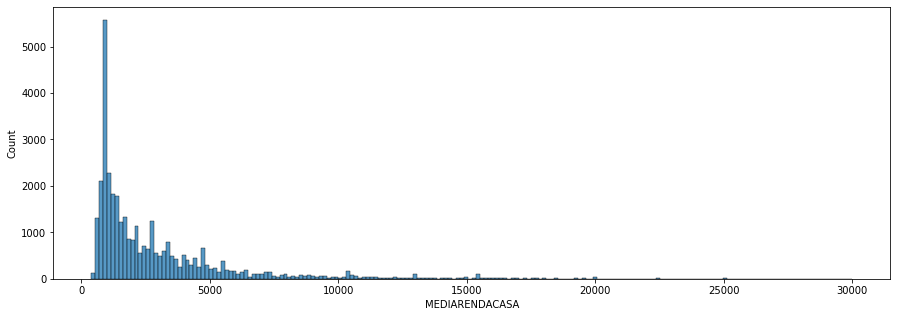

**Boxplot for MEDIARENDACASA**

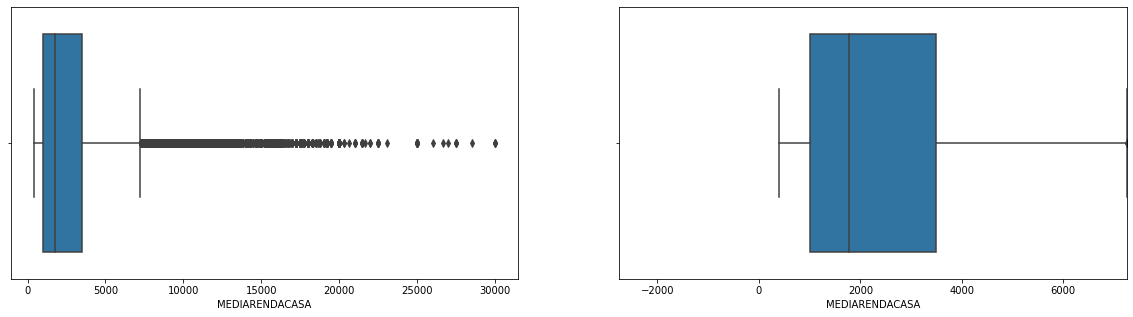

### DISCUSSION

Analisando os dados, é possível dizer que o tipo da distribuição dos dados é  assimétrica positiva, pois a média da variável é maior do que seus valores  de mediana e moda. Neste tópico foi feita a análise da variável MEDIARENDACASA, essa   variável se refere à renda média de indivíduos que moram na mesma moradia. Foram realizados  dois tipos de plotagem: histogram e boxplot (um dos boxplots não apresenta Outliers). Os gráficos  gerados mostram que a maioria dos indivíduos que vivem na mesma casa apresentam uma renda presumida média  inferior a 6000 reais, logo a hipótese de que a maioria dos indivíduos que vivem na mesma casa apresentam uma renda presumida média  maior do que R$6.000,00 está incorreta.

In [ ]:
column = 'MEDIARENDACASA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('A maioria dos indivíduos que vivem na mesma casa apresentam uma renda presumida média maior do que R$6.000,00.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Histogram for {column}**'))
histogram(df[column])
plt.show()

display(Markdown('**Boxplot for {}**'.format(column)))
boxplot_with_and_without_limits(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível dizer que o tipo da distribuição dos dados é \
 assimétrica positiva, pois a média da variável é maior do que seus valores \
 de mediana e moda. Neste tópico foi feita a análise da variável MEDIARENDACASA, essa  \
 variável se refere à renda média de indivíduos que moram na mesma moradia. Foram realizados \
 dois tipos de plotagem: histogram e boxplot (um dos boxplots não apresenta Outliers). Os gráficos \
 gerados mostram que a maioria dos indivíduos que vivem na mesma casa apresentam uma renda presumida média \
 inferior a 6000 reais, logo a hipótese de que a maioria dos indivíduos que vivem na mesma casa apresentam uma renda presumida média \
 maior do que R$6.000,00 está incorreta.'))

## SOMARENDACASA

### HYPOTHESIS

A soma da renda de indivíduos que moram na mesma casa, em média, é inferior a R$15.000,00.

### ANALYSIS

**Skewness for SOMARENDACASA**: 2.5114002526656125 (Positively Skewed Distribution)

**Kurtosis for SOMARENDACASA**: 8.427555769300422 (Leptokurtotic)

**Mean for SOMARENDACASA**: 8266.951069373265

**Median for SOMARENDACASA**: 5400.0

**Mode for SOMARENDACASA**: 1800.0

**Type of data distribution**: Positively Asymmetric Distribution

**Histogram for SOMARENDACASA**

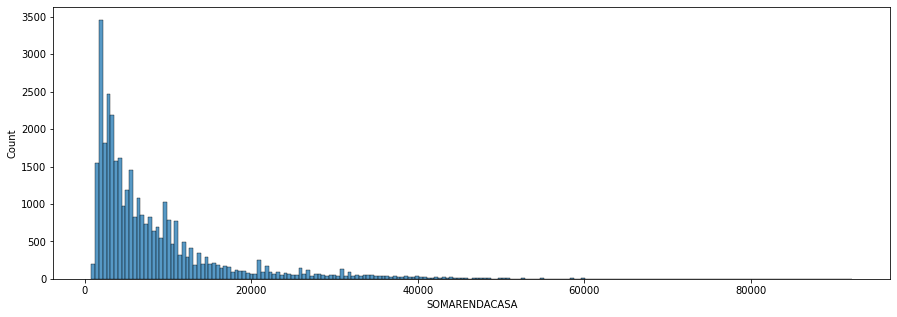

**Boxplot for SOMARENDACASA**

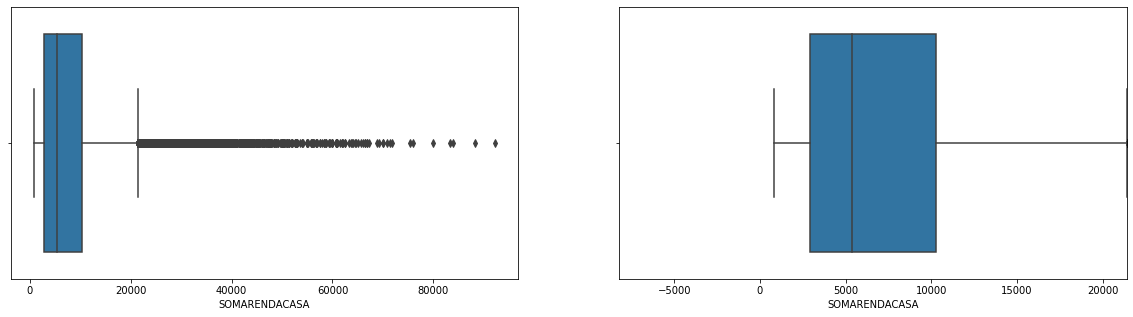

### DISCUSSION

Analisando os dados, é possível dizer que o tipo da distribuição dos dados é  assimétrica positiva, pois a média da variável é maior do que seus valores  de mediana e moda. Neste tópico foi feita a análise da variável SOMARENDACASA, essa variável está  relacionada à soma das rendas de indivíduos que vivem na mesma moradia. Foram realizados  dois tipos de plotagem: histogram e boxplot (um dos boxplots não apresenta Outliers). Os gráficos  gerados mostram que a soma da renda de indivíduos que moram na mesma casa, em média, está entre 3000 reais e 10500 reais (aproximadamente), logo a hipótese de que a soma da renda de indivíduos que moram na mesma casa, em média, é inferior a 15000 reais está correta.

In [ ]:
column = 'SOMARENDACASA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('A soma da renda de indivíduos que moram na mesma casa, em média, é inferior a R$15.000,00.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown('**Histogram for {}**'.format(column)))
histogram(df[column])
plt.show()

display(Markdown('**Boxplot for {}**'.format(column)))
boxplot_with_and_without_limits(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível dizer que o tipo da distribuição dos dados é \
 assimétrica positiva, pois a média da variável é maior do que seus valores \
 de mediana e moda. Neste tópico foi feita a análise da variável SOMARENDACASA, essa variável está \
 relacionada à soma das rendas de indivíduos que vivem na mesma moradia. Foram realizados \
 dois tipos de plotagem: histogram e boxplot (um dos boxplots não apresenta Outliers). Os gráficos \
 gerados mostram que a soma da renda de indivíduos que moram na mesma casa, em média, está entre 3000 reais e 10500 reais (aproximadamente),\
 logo a hipótese de que a soma da renda de indivíduos que moram na mesma casa, em média, é inferior a 15000 reais está correta.'))

## DISTZONARISCO

### HYPOTHESIS

Mais da metade dos indivíduos registrados na base de dads vivem a, no máximo, 10.000 metros de distância de uma zona de risco.

### ANALYSIS

**Skewness for DISTZONARISCO**: 2.3947446669742924 (Positively Skewed Distribution)

**Kurtosis for DISTZONARISCO**: 5.8533514471049095 (Leptokurtotic)

**Mean for DISTZONARISCO**: 79226.77310712636

**Median for DISTZONARISCO**: 3166.0

**Mode for DISTZONARISCO**: 0.0

**Type of data distribution**: Positively Asymmetric Distribution

**Histogram for DISTZONARISCO**

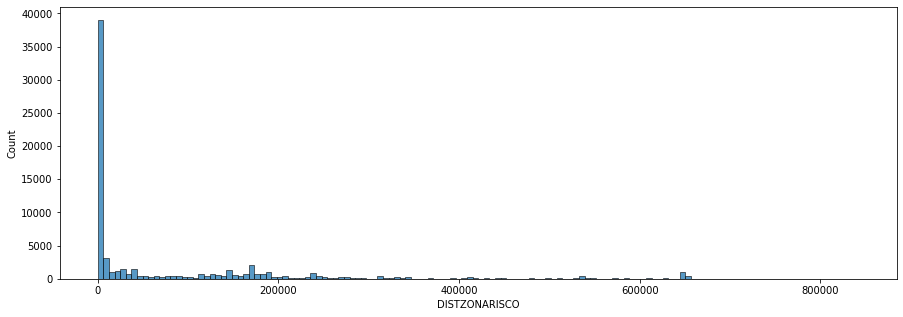

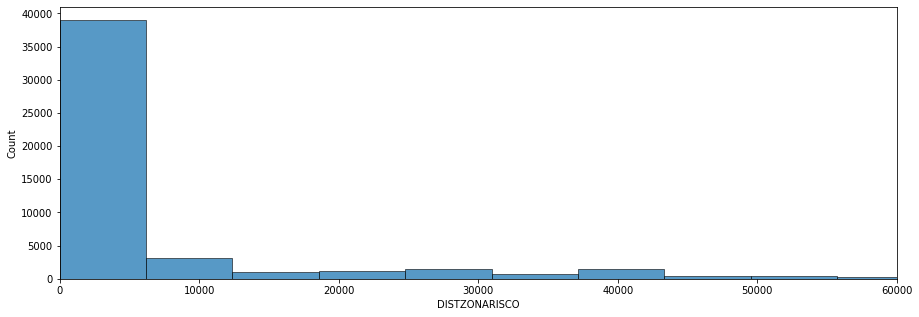

**Violinplot for DISTZONARISCO**

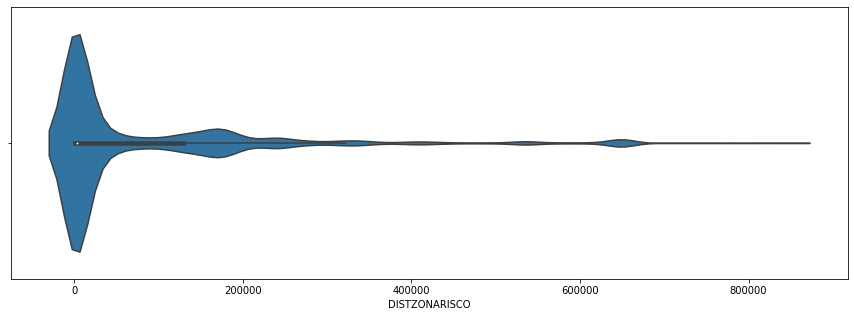

### DISCUSSION

Analisando os dados, é possível dizer que o tipo da distribuição dos dados é  assimétrica positiva, pois a média da variável é maior do que seus valores  de mediana e moda. Neste tópico foi feita a análise da variável DISTZONARISCO, que está  relacionada à distância (em metros) de uma moradia em relação à zona de risco mais próxima. Foram realizados  dois tipos de plotagem: histogram e violinplot. O segundo histograma foi plotado de forma  diferente do primeiro para facilitar a análise de dados. Os gráficos gerados mostram que 58% dos indivíduos da base vivem em moradias que ficam a, no máximo, 10.000 metros (aproximadamente) de uma zona de risco, logo a hipótese de que mais da metade dos indivíduos registrados na base de dads vivem a, no máximo, 10.000 metros de distância de uma zona de risco está correta (foram considerados somente valores não nulos para realizar o cálculo da porcentagem).

In [ ]:
column = 'DISTZONARISCO'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Mais da metade dos indivíduos registrados na base de dads vivem a, no máximo, 10.000 metros de distância de uma zona de risco.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown('**Histogram for {}**'.format(column)))
histogram(df[column])
plt.show()

histogram(df[column])
plt.xlim(0,60000)
plt.show()

display(Markdown(f'**Violinplot for {column}**'))
violin(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível dizer que o tipo da distribuição dos dados é \
 assimétrica positiva, pois a média da variável é maior do que seus valores \
 de mediana e moda. Neste tópico foi feita a análise da variável DISTZONARISCO, que está \
 relacionada à distância (em metros) de uma moradia em relação à zona de risco mais próxima. Foram realizados \
 dois tipos de plotagem: histogram e violinplot. O segundo histograma foi plotado de forma \
 diferente do primeiro para facilitar a análise de dados. Os gráficos gerados mostram que 58% dos indivíduos da base vivem em moradias que ficam a,\
 no máximo, 10.000 metros (aproximadamente) de uma zona de risco, logo a hipótese de que mais da metade dos indivíduos registrados\
 na base de dads vivem a, no máximo, 10.000 metros de distância de uma zona de risco está correta (foram considerados somente valores não nulos para realizar o cálculo da porcentagem).'))


## MAIORRENDACASA

### HYPOTHESIS

A maioria dos indivíduos de maior renda registrados na base de dados possuem uma renda superior a R$10.000,00.

### ANALYSIS

**Skewness for MAIORRENDACASA**: 2.3968936924183835 (Positively Skewed Distribution)

**Kurtosis for MAIORRENDACASA**: 5.9763005486557805 (Leptokurtotic)

**Mean for MAIORRENDACASA**: 5255.512926961949

**Median for MAIORRENDACASA**: 3000.0

**Mode for MAIORRENDACASA**: 900.0

**Type of data distribution**: Positively Asymmetric Distribution

**Histogram for MAIORRENDACASA**

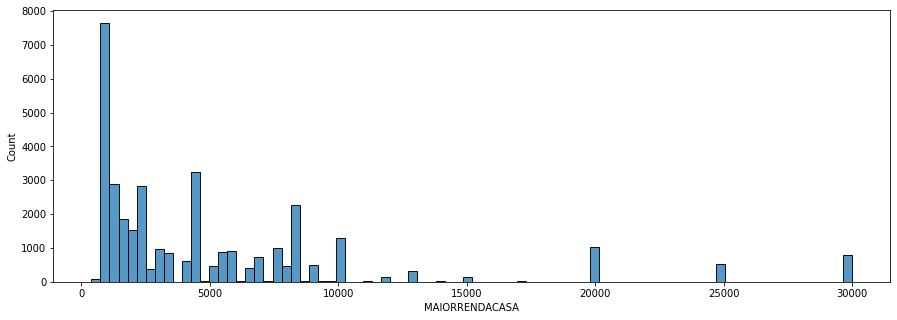

**Boxplot for MAIORRENDACASA**

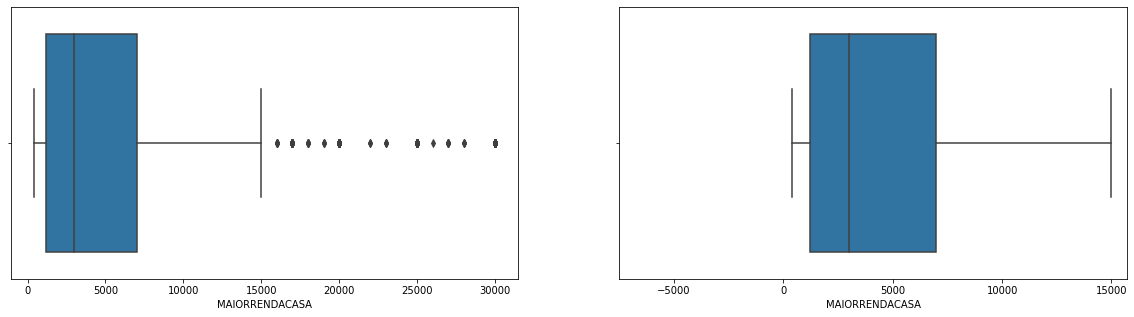

### DISCUSSION

Analisando os dados, é possível dizer que o tipo da distribuição dos dados é  assimétrica positiva, pois a média da variável é maior do que seus valores  de mediana e moda. Neste tópico foi feita a análise da variável MAIORRENDACASA, essa variável está  relacionada à renda presumida máxima dos indivíduos que vivem na mesma moradia. Foram realizados  dois tipos de plotagem: histogram e boxplot (um dos boxplots não apresenta Outliers). Os gráficos  gerados mostram que a soma da renda de indivíduos que moram na mesma casa, em média, está entre 2000 e 7000 (aproximadamente), logo a hipótese de que a maioria dos indivíduos de maior renda registrados na base de dados possuem uma renda superior a 10000 está incorreta.

In [ ]:
column = 'MAIORRENDACASA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('A maioria dos indivíduos de maior renda registrados na base de dados possuem uma renda superior a R$10.000,00.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown('**Histogram for {}**'.format(column)))
histogram(df[column])
plt.show()

display(Markdown('**Boxplot for {}**'.format(column)))
boxplot_with_and_without_limits(df[column])
plt.show()

#display(Markdown('**Violinplot for {}**'.format(MAIORRENDACASA)))
#violin(df[MAIORRENDACASA])
#plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível dizer que o tipo da distribuição dos dados é \
 assimétrica positiva, pois a média da variável é maior do que seus valores \
 de mediana e moda. Neste tópico foi feita a análise da variável MAIORRENDACASA, essa variável está \
 relacionada à renda presumida máxima dos indivíduos que vivem na mesma moradia. Foram realizados \
 dois tipos de plotagem: histogram e boxplot (um dos boxplots não apresenta Outliers). Os gráficos \
 gerados mostram que a soma da renda de indivíduos que moram na mesma casa, em média, está entre 2000 e 7000 (aproximadamente),\
 logo a hipótese de que a maioria dos indivíduos de maior renda registrados na base de dados possuem uma renda superior a 10000 está incorreta.'))

## MENORRENDACASA

### HYPOTHESIS

O valor da menor renda dentro de uma residência é abaixo de R$1.000,00.

### ANALYSIS

**Skewness for MENORRENDACASA**: 6.622857549954847 (Positively Skewed Distribution)

**Kurtosis for MENORRENDACASA**: 69.73901035317598 (Leptokurtotic)

**Mean for MENORRENDACASA**: 1208.3001689237553

**Median for MENORRENDACASA**: 900.0

**Mode for MENORRENDACASA**: 900.0

**Type of data distribution**: Positively Asymmetric Distribution

**Representation of MENORRENDACASA using KDE (without outliers)**

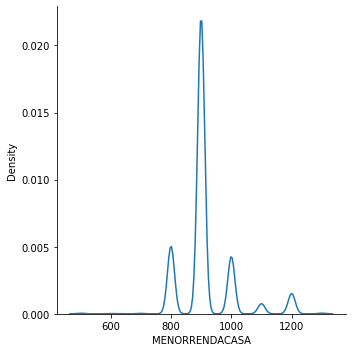

### DISCUSSION

Analisando os dados, é possível observar que se trata de uma distribuição assimétrica positiva,   pois a média da variável é maior que a mediana e a moda. Neste tópico analisamos a variável MENORRENDACASA,   nela é possível observar qual é a menor renda dentro de uma residência. Para o entendimento da distribuição, removemos   os outliers e utilizamos uma plotagem de kenel density estimation (KDE). Essa visualização nos permitiu concluir que   a hipótese está correta, pois a maior concentração dos valores está na faixa dos valores abaixo de R$1.000,00.

In [ ]:
Chromecolumn = 'MENORRENDACASA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('O valor da menor renda dentro de uma residência é abaixo de R$1.000,00.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Representation of {column} using KDE (without outliers)**'))
res = remove_outliers(df, column)
df2 = res[0]
sns.displot(df2[column], kind='kde')
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível observar que se trata de uma distribuição assimétrica positiva, \
  pois a média da variável é maior que a mediana e a moda. Neste tópico analisamos a variável MENORRENDACASA, \
  nela é possível observar qual é a menor renda dentro de uma residência. Para o entendimento da distribuição, removemos \
  os outliers e utilizamos uma plotagem de kenel density estimation (KDE). Essa visualização nos permitiu concluir que \
  a hipótese está correta, pois a maior concentração dos valores está na faixa dos valores abaixo de R$1.000,00.'))

## QTDDECLARACAO10

### HYPOTHESIS

A maioria das pessoas que pediram empréstimo não declararam imposto de renda nos últimos 10 anos.

### ANALYSIS

**Skewness for QTDDECLARACAO10**: 1.9075490632028977 (Positively Skewed Distribution)

**Kurtosis for QTDDECLARACAO10**: 2.191235877813296 (Leptokurtotic)

**Mean for QTDDECLARACAO10**: 1.5757589094149878

**Median for QTDDECLARACAO10**: 0.0

**Mode for QTDDECLARACAO10**: 0.0

**Type of data distribution**: Positively Asymmetric Distribution

**Representation of QTDDECLARACAO10 using an histogram**

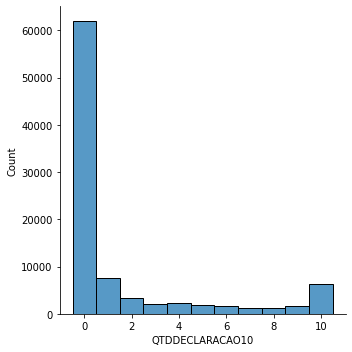

### DISCUSSION

Analisando os dados, é possível observar que o tipo da distribuição dos dados é   assimétrica positiva, pois a média da variável é maior do que seus valores   de mediana e moda. Neste tópico foi feita a análise da variável QTDDECLARACAO10, esta variável está   relacionada à quantidade de vezes que a pessoa que pediu empréstimo declarou imposto de renda   nos últimos 10 anos. Para o entendimento da distribuição utilizamos uma plotagem de histograma.   E essa visualização nos permitiu concluir que a hipótese está correta, pois a maior parte dos valores   está concentrada na coluna de 0 declarações nos últimos 10 anos.

In [ ]:
column = 'QTDDECLARACAO10'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('A maioria das pessoas que pediram empréstimo não declararam imposto de renda nos últimos 10 anos.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Representation of {column} using an histogram**'))
sns.displot(df[column], discrete=True)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível observar que o tipo da distribuição dos dados é \
  assimétrica positiva, pois a média da variável é maior do que seus valores \
  de mediana e moda. Neste tópico foi feita a análise da variável QTDDECLARACAO10, esta variável está \
  relacionada à quantidade de vezes que a pessoa que pediu empréstimo declarou imposto de renda \
  nos últimos 10 anos. Para o entendimento da distribuição utilizamos uma plotagem de histograma. \
  E essa visualização nos permitiu concluir que a hipótese está correta, pois a maior parte dos valores \
  está concentrada na coluna de 0 declarações nos últimos 10 anos.'))

## IDHMUNICIPIO

### HYPOTHESIS

A maior parte das pessoas vive num município com IDH abaixo de 70.

### ANALYSIS

**Skewness for IDHMUNICIPIO**: -1.1055647543327072 (Negatively Skewed Distribution)

**Kurtosis for IDHMUNICIPIO**: 2.6193768661950916 (Leptokurtotic)

**Mean for IDHMUNICIPIO**: 74.67014944186893

**Median for IDHMUNICIPIO**: 75.0

**Mode for IDHMUNICIPIO**: 73.0

**Type of data distribution**: Negatively Asymmetric Distribution

**Representation of IDHMUNICIPIO using KDE**

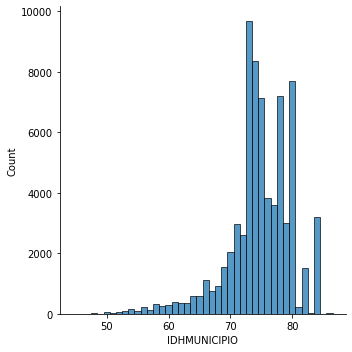

### DISCUSSION

Analisando os dados, é possível observar que o tipo da distribuição dos dados é   assimétrica negativa, pois a média da variável é menor do que seus valores   de mediana e moda. Neste tópico foi feita a análise da variável IDHMUNICIPIO, esta variável está   indica o IDH do município onde a pessoa que pediu empréstimo reside. Para o entendimento da   distribuição utilizamos uma plotagem de histograma. E essa visualização nos permitiu concluir   que a hipótese está incorreta, pois a maior parte dos valores de IDH está acima que 70.

In [ ]:
column = 'IDHMUNICIPIO'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown(f'A maior parte das pessoas vive num município com IDH abaixo de 70.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Representation of {column} using KDE**'))
sns.displot(df[column], discrete=True)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando os dados, é possível observar que o tipo da distribuição dos dados é \
  assimétrica negativa, pois a média da variável é menor do que seus valores \
  de mediana e moda. Neste tópico foi feita a análise da variável IDHMUNICIPIO, esta variável está \
  indica o IDH do município onde a pessoa que pediu empréstimo reside. Para o entendimento da \
  distribuição utilizamos uma plotagem de histograma. E essa visualização nos permitiu concluir \
  que a hipótese está incorreta, pois a maior parte dos valores de IDH está acima que 70.'))

## INDICEEMPREGO

### HYPOTHESIS

Pessoas com baixo INDICEEMPREGO (índice de estabilidade no emprego) são o maior grupo.

### ANALYSIS

**Skewness for INDICEEMPREGO**: 1.020995734676511 (Positively Skewed Distribution)

**Kurtosis for INDICEEMPREGO**: -0.5829083031762061 (Platykurtotic)

**Mean for INDICEEMPREGO**: 1.501303816827489

**Median for INDICEEMPREGO**: 0.0

**Mode for INDICEEMPREGO**: 0.0

**Type of data distribution**: Positively Asymmetric Distribution

**Contagem de pessoas empregadas de acordo com o índice de estabilidade no emprego.**

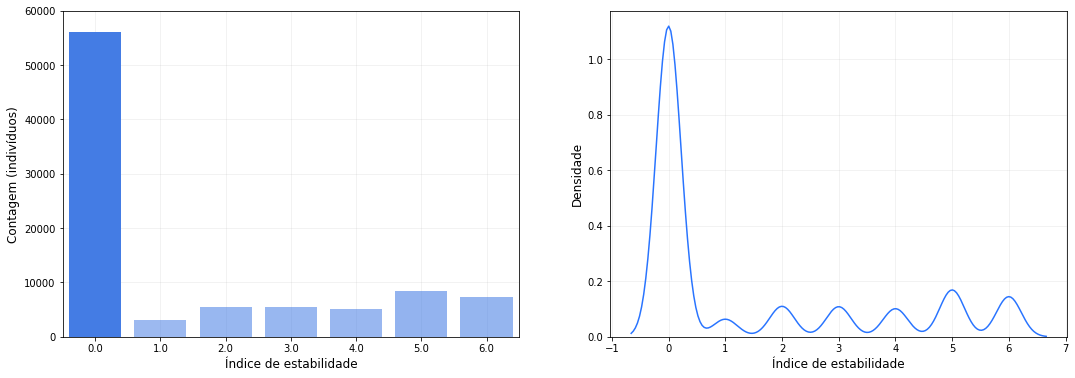

### DISCUSSION

Ainda que não se saiba quais as métricas e os cálculos utilizados na obtenção deste índice,
pode-se confirmar a hipótese proposta, anteriormente.  
Como demonstrado no gráfico de barras, é notável a grande frequência de pessoas com baixo índice de estabilidade.  

Aproximadamente, 75% das pessoas tem um índice de estabilidade dentro do intervalo fechado [0.0, 3.0].  
Tomando-se a soma dos 4 primeiros valores (da base ordenada por índice) divida pela soma total, pode-se esperar uma porcentagem extremamente coerente com 75%.
Portanto, esta observação é correta e pode ser provada com as seguintes análises:  

---

- Análise dos quartis e validação da soma das porcentagens:

|Descrição|Valor [0,1]|Porcentagem (≈)|
|:-|:-|:-|
|Q3|0.7716|77.16|
|Q3 ao Q4|0.2284|22.84|
|Soma|1.0|100.00|  

- Demonstração dos valores mais frequentes em cada quantil:

|Quantil|Índice de Estabilidade|
|:-:|:-:|
|0.25|0.0|
|0.5|0.0|
|0.75|3.0|
|1.0|6.0|

---

Confirma-se o fato de que, pela média ser maior que ambas a mediana e a moda, a distribuição é assimétrica positiva.  
Isso pode ser evidenciado pelos gráficos, que trazem boa noção da distribuição dos dados para a análise desta variável.


In [ ]:
column = 'INDICEEMPREGO'

display(Markdown(f'## {column}'))  # Title

display(Markdown('### HYPOTHESIS'))  # Hypothesis
display(Markdown(f'Pessoas com baixo {column} (índice de estabilidade no emprego) são o maior grupo.'))

display(Markdown('### ANALYSIS'))  # Analysis

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))  # Skewness

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))  # Kurtosis

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Contagem de pessoas empregadas de acordo com o índice de estabilidade no emprego.**'))

data = df[column].value_counts()

plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex='row', sharey='col')

# BARPLOT
plt.subplot(1,2,1)
bp = sns.barplot(data=df, x=data.keys(), y=data.values, color='#2974FF')
bp.set_axisbelow(True)
plt.grid(alpha=.2)
plt.xlabel("Índice de estabilidade", fontsize=12)
plt.ylabel("Contagem (indivíduos)", fontsize=12)
yticks = np.linspace(0,6*10**4,7,dtype=np.int64)
plt.yticks(yticks, labels=map(int, yticks))

# Used to normalize alpha transparency
top_value = df[column].value_counts().max()

# Changing each bar's opacity, according to frequency per value
for bar in bp.containers[0]:
    bar.set_alpha((bar.get_height()+top_value)/(2*top_value))


# KDEPLOT
plt.subplot(1,2,2)
dp = sns.kdeplot(x=df['INDICEEMPREGO'], color="#2974FF")
plt.grid(alpha=.2)
plt.xlabel("Índice de estabilidade", fontsize=12)
plt.ylabel("Densidade", fontsize=12)

plt.show()

# Validating the visualization
values = data.sort_index().tolist()
total  = sum(values    )
q3_sum = sum(values[:4])
rest   = sum(values[4:])

q3       = round(q3_sum/total, 4)
q3_q4    = round(rest/total, 4)
checksum = q3+q3_q4

quantiles_table = df['INDICEEMPREGO'].quantile(np.linspace(0.25,1,4)).to_dict()
quantiles_table = (lambda d: list(zip(d.keys(), d.values())))(quantiles_table)
quantiles_table = '|Quantil|Índice de Estabilidade|\n|:-:|:-:|\n' + '\n'.join(['|{}|{}|'.format(*i) for i in quantiles_table])

display(Markdown('### DISCUSSION'))
display(Markdown(f"""Ainda que não se saiba quais as métricas e os cálculos utilizados na obtenção deste índice,
pode-se confirmar a hipótese proposta, anteriormente.  
Como demonstrado no gráfico de barras, é notável a grande frequência de pessoas com baixo índice de estabilidade.  

Aproximadamente, 75% das pessoas tem um índice de estabilidade dentro do intervalo fechado [0.0, 3.0].  
Tomando-se a soma dos 4 primeiros valores (da base ordenada por índice) divida pela soma total, pode-se esperar uma porcentagem extremamente coerente com 75%.
Portanto, esta observação é correta e pode ser provada com as seguintes análises:  

---

- Análise dos quartis e validação da soma das porcentagens:

|Descrição|Valor [0,1]|Porcentagem (≈)|
|:-|:-|:-|
|Q3|{q3}|{q3*100:<.2f}|
|Q3 ao Q4|{q3_q4}|{q3_q4*100:<.2f}|
|Soma|{checksum}|{checksum*100:<.2f}|  

- Demonstração dos valores mais frequentes em cada quantil:

{quantiles_table}

---

Confirma-se o fato de que, pela média ser maior que ambas a mediana e a moda, a distribuição é assimétrica positiva.  
Isso pode ser evidenciado pelos gráficos, que trazem boa noção da distribuição dos dados para a análise desta variável.
"""))

## QTDPESSOASCASA

### HYPOTHESIS

A QTDPESSOASCASA (quantidade de pessoas por casa) é uniforme e bem distribuído entre a maioria das casas.

### ANALYSIS

**Skewness for QTDPESSOASCASA**: 1.755419858820174 (Positively Skewed Distribution)

**Kurtosis for QTDPESSOASCASA**: 4.151266561585027 (Leptokurtotic)

**Mean for QTDPESSOASCASA**: 2.9969937297792537

**Median for QTDPESSOASCASA**: 3.0

**Mode for QTDPESSOASCASA**: 2.0

**Type of data distribution**: Negatively Asymmetric Distribution

**Quantidade de membros por casa.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


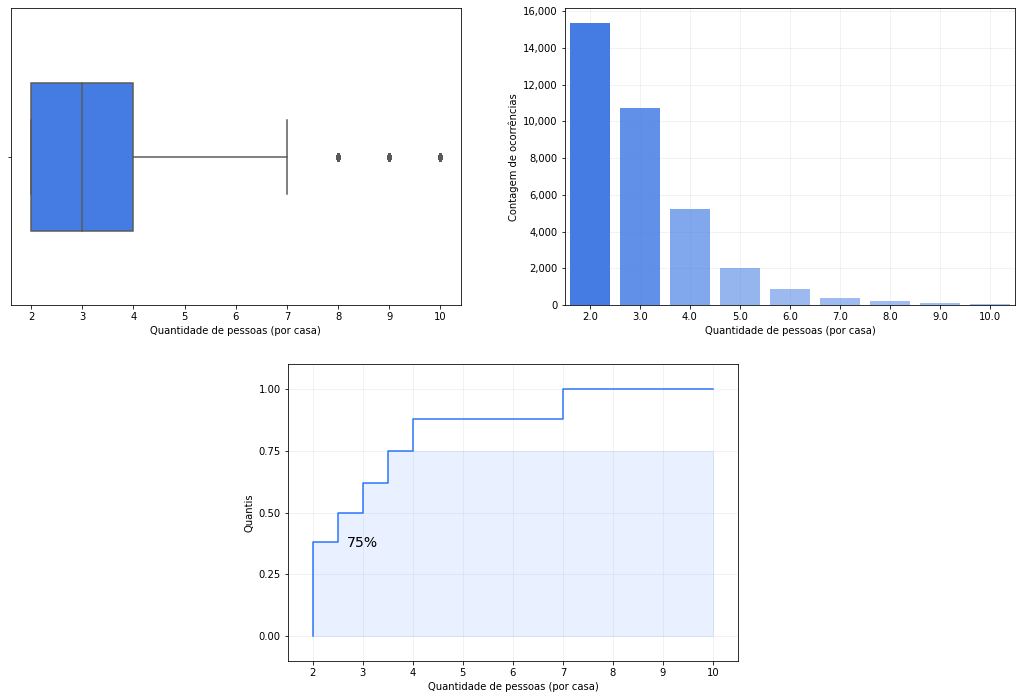

### DISCUSSION


Pela leitura dos gráficos, pode-se notar a assimetria da distribuição dos dados. Há muito mais casas com poucas pessoas, do que casas bem populosas.  
A distribuição dos dados é assimétrica negativa, pois a média menor do que a mediana.  

Tendo em vista a visualização dos dados nos gráficos, pode-se constatar que a hipótese é falsa, pois há uma grande 
disparidade entre os valores extremos. Isso nos permite inferir que quanto mais pessoas dentro de uma mesma casa, mais incomum são estes casos.

In [ ]:
column = 'QTDPESSOASCASA'

display(Markdown(f'## {column}'))  # Title

display(Markdown('### HYPOTHESIS'))  # Hypothesis
display(Markdown(f'A {column} (quantidade de pessoas por casa) é uniforme e bem distribuído entre a maioria das casas.'))

display(Markdown('### ANALYSIS'))  # Analysis

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))  # Skewness

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))  # Kurtosis

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Quantidade de membros por casa.**'))

plt.subplots(figsize=(18,12))
plt.subplots_adjust(wspace=0.6, hspace=0.2)

# BOXPLOT
plt.subplot2grid((2,4), (0,0), colspan=2)
boxp = sns.boxplot(df[column], color='#2974FF', width=0.5)
plt.xlabel("Quantidade de pessoas (por casa)")


# COUNTPLOT
plt.subplot2grid((2,4), (0,2), colspan=2)
cp = sns.countplot(df[column], color='#2974FF')
cp.set_axisbelow(True)
plt.grid(alpha=0.2)
plt.xlabel("Quantidade de pessoas (por casa)")
plt.ylabel("Contagem de ocorrências")
yticks = np.linspace(0,16*10**3,9,dtype=np.int64)
plt.yticks(yticks, labels=map(lambda i: f'{int(i):,}', yticks))

# Used to normalize alpha transparency
top_value = df[column].value_counts().max()

# Changing each bar's opacity, according to frequency per value
for bar in cp.containers[0]:
    bar.set_alpha((bar.get_height()+top_value)/(2*top_value))


# STEP PLOT
plt.subplot2grid((2,4), (1,1), colspan=2)
data = (lambda d: ([round(i, 2) for i in list(d.keys())], list(d.values())))(df[column].quantile(np.linspace(0,1,9)).to_dict())
data=data[::-1]

X, y = data
xlim = min(X), max(X)
ylim = min(y), max(y)

paddingx = (lambda lo, hi: lambda margin: (lo-margin, hi+margin))(*xlim)
paddingy = (lambda lo, hi: lambda margin: (lo-margin, hi+margin))(*ylim)
plt.step(*data, '-', color='#2974FF', where='mid')
plt.xticks(np.linspace(*xlim, 9))
plt.yticks(np.linspace(*ylim, 5))
plt.xlim(paddingx(0.5))
plt.ylim(paddingy(0.1))
plt.ylabel('Quantis')
plt.xlabel('Quantidade de pessoas (por casa)')
plt.text(df[column].quantile(0.5), (0.375), '75%', fontsize=14, horizontalalignment='center', verticalalignment='center')
plt.grid(alpha=0.2)
plt.fill_between(X, list(map(lambda x: y[x] if y[x] < 0.75 else 0.75, range(len(X)))), step='mid', color='#2974FF', alpha=0.1)

plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown(f"""
Pela leitura dos gráficos, pode-se notar a assimetria da distribuição dos dados. Há muito mais casas com poucas pessoas, do que casas bem populosas.  
A distribuição dos dados é assimétrica negativa, pois a média menor do que a mediana.  

Tendo em vista a visualização dos dados nos gráficos, pode-se constatar que a hipótese é falsa, pois há uma grande 
disparidade entre os valores extremos. Isso nos permite inferir que quanto mais pessoas dentro de uma mesma casa, mais incomum são estes casos."""))

## PERCENTSUPERIORCEP

### HYPOTHESIS

A grande maioria das pessoas num mesmo CEP possuem grau superior incompleto.

### ANALYSIS

**Skewness for PERCENTSUPERIORCEP**: 1.310681417424696 (Positively Skewed Distribution)

**Kurtosis for PERCENTSUPERIORCEP**: 2.660917203909718 (Leptokurtotic)

**Mean for PERCENTSUPERIORCEP**: 3.447162456182763

**Median for PERCENTSUPERIORCEP**: 3.0

**Mode for PERCENTSUPERIORCEP**: 3.0

**Type of data distribution**: Positively Asymmetric Distribution

**Percentual de pessoas com escolaridade SUPERIOR INCOMPLETO que vivem no mesmo CEP do proponente.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


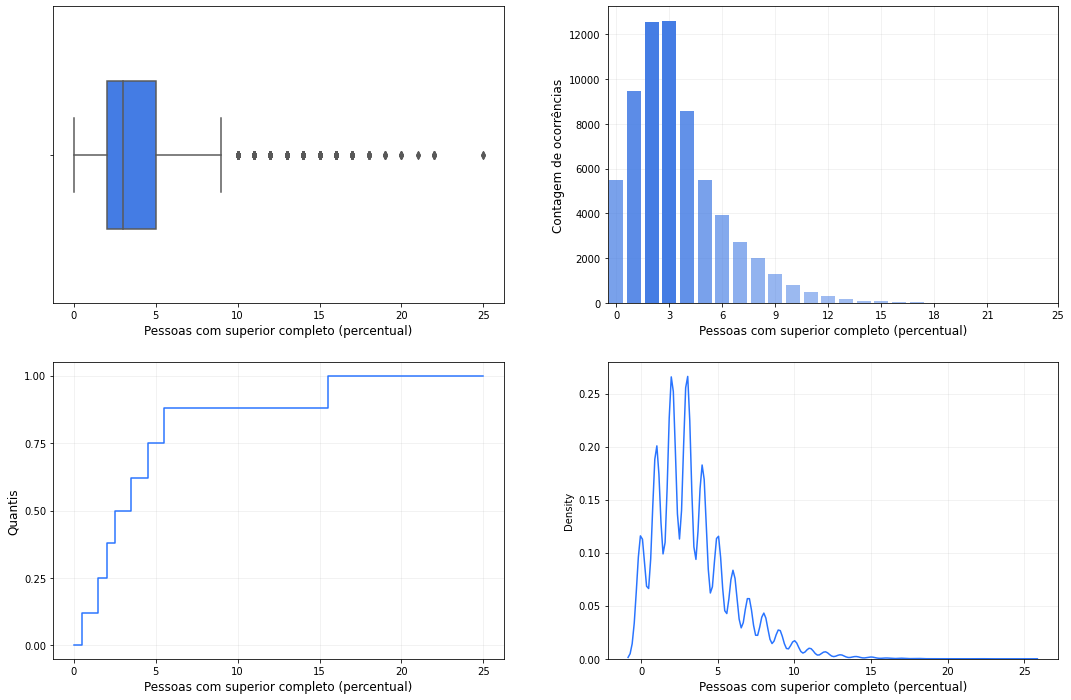

### DISCUSSION

Como podemos observar nos gráficos apresentados, não há grandes percentuais de pessoas com grau superior incompleto no mesmo CEP. Percebe-se que, na verdade, na grande maioria, cerca de apenas 2% a 3% das pessoas possui este grau de escolaridade.  

Com isso, as porcentagens maiores são tratadas como outliers. Esta distribuição de dados configura uma assimetria positiva.


In [ ]:
column = 'PERCENTSUPERIORCEP'

display(Markdown(f'## {column}'))  # Title

display(Markdown('### HYPOTHESIS'))  # Hypothesis
display(Markdown('A grande maioria das pessoas num mesmo CEP possuem grau superior incompleto.'))

display(Markdown('### ANALYSIS'))  # Analysis

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))  # Skewness

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))  # Kurtosis

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Percentual de pessoas com escolaridade SUPERIOR INCOMPLETO que vivem no mesmo CEP do proponente.**'))

plt.subplots(figsize=(18,12))
plt.subplots_adjust(wspace=0.6, hspace=0.2)


# BOXPLOT
plt.subplot2grid((2,4), (0,0), colspan=2)
boxp = sns.boxplot(df[column], color='#2974FF', width=0.5)
plt.xlabel("Pessoas com superior completo (percentual)", fontsize=12)


# COUNTPLOT
plt.subplot2grid((2,4), (0,2), colspan=2)
cp = sns.countplot(df[column], color='#2974FF')
cp.set_axisbelow(True)
plt.grid(alpha=0.2)
plt.xlabel("Pessoas com superior completo (percentual)", fontsize=12)
plt.ylabel("Contagem de ocorrências", fontsize=12)
xticks = df[column].value_counts().keys()
xticks = np.linspace(xticks.min(), xticks.max(), 9, dtype=np.int64)
plt.xticks(xticks, labels=map(int, xticks))

# Used to normalize alpha transparency
top_value = df[column].value_counts().max()

# Changing each bar's opacity, according to frequency per value
for bar in cp.containers[0]:
    bar.set_alpha((bar.get_height()+top_value)/(2*top_value))


# STEP PLOT
plt.subplot2grid((2,4), (1,0), colspan=2)
data = (lambda d: ([round(i, 2) for i in list(d.keys())], list(d.values())))(df[column].quantile(np.linspace(0,1,9)).to_dict())
data=data[::-1]
plt.grid(alpha=0.2)
X, y = data
xlim = min(X), max(X)
ylim = min(y), max(y)
plt.step(*data, '-', color='#2974FF', where='mid')
plt.yticks(np.linspace(*ylim, 5))
plt.ylabel('Quantis', fontsize=12)
plt.xlabel('Pessoas com superior completo (percentual)', fontsize=12)


# KDEPLOT
plt.subplot2grid((2,4), (1,2), colspan=2)
kd = sns.kdeplot(df[column], color='#2974FF')
plt.xlabel('Pessoas com superior completo (percentual)', fontsize=12)
plt.grid(alpha=0.2)

plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown(f"""Como podemos observar nos gráficos apresentados, não há grandes percentuais de pessoas com grau superior incompleto no mesmo CEP. Percebe-se que, na verdade, na grande maioria, cerca de apenas 2% a 3% das pessoas possui este grau de escolaridade.  

Com isso, as porcentagens maiores são tratadas como outliers. Esta distribuição de dados configura uma assimetria positiva.
"""))

## PERCENTBOLSAFAMILIACEP

### HYPOTHESIS

Percentual de pessoas inscritas no bolsa familia que vivem no mesmo CEP, é maior do que 70%.

### ANALYSIS

**Skewness for PERCENTBOLSAFAMILIACEP**: 1.6074450896531585 (Positively Skewed Distribution)

**Kurtosis for PERCENTBOLSAFAMILIACEP**: 3.0075031798162333 (Leptokurtotic)

**Mean for PERCENTBOLSAFAMILIACEP**: 3.9381165784408085

**Median for PERCENTBOLSAFAMILIACEP**: 3.0

**Mode for PERCENTBOLSAFAMILIACEP**: 1.0

**Type of data distribution**: Positively Asymmetric Distribution

**Boxplot for PERCENTBOLSAFAMILIACEP**

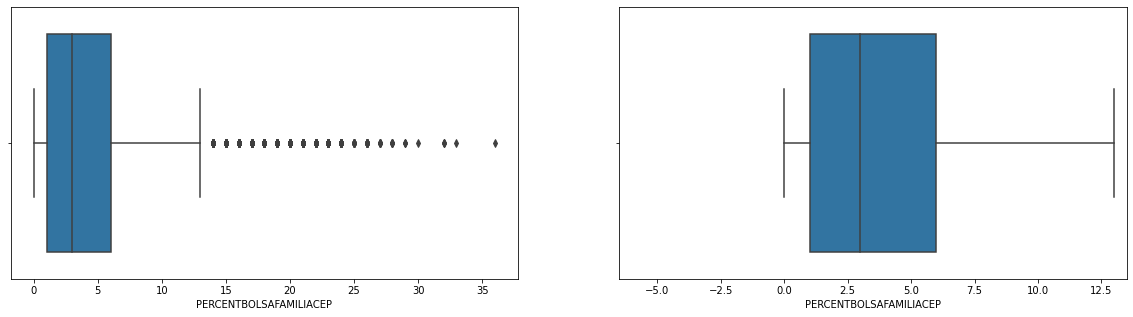

**kdeplot for PERCENTBOLSAFAMILIACEP**

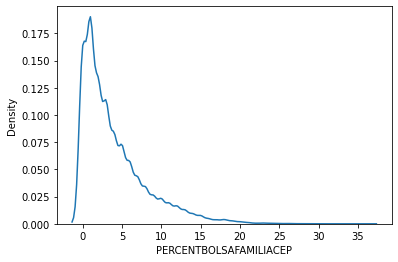

### DISCUSSION

Conforme os dados da variável PERCENTBOLSAFAMILIACEP, é possível dizer que o tipo da distribuição dos dados é   assimétrica positiva, pois a média da variável é maior do que seu valor   de moda. Essa variável se refere à porcentagem da quantidade de pessoas inscritas no bolsa familia que vivem no mesmo CEP.   As plotagens usadas foram Boxplot e kdeplot. Os gráficos   gerados mostram que menos de 10% das pessoas inscritas no bolsa familia, vivem no mesmo CEP,   logo a hipótese está incorreta.

In [ ]:
column = 'PERCENTBOLSAFAMILIACEP'

display(Markdown('## {}'.format(column)))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Percentual de pessoas inscritas no bolsa familia que vivem no mesmo CEP, é maior do que 70%.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown('**Boxplot for {}**'.format(column)))
boxplot_with_and_without_limits(df[column])
plt.show()

display(Markdown('**kdeplot for {}**'.format(column)))
sns.kdeplot(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Conforme os dados da variável PERCENTBOLSAFAMILIACEP, é possível dizer que o tipo da distribuição dos dados é \
  assimétrica positiva, pois a média da variável é maior do que seu valor \
  de moda. Essa variável se refere à porcentagem da quantidade de pessoas inscritas no bolsa familia que vivem no mesmo CEP. \
  As plotagens usadas foram Boxplot e kdeplot. Os gráficos \
  gerados mostram que menos de 10% das pessoas inscritas no bolsa familia, vivem no mesmo CEP, \
  logo a hipótese está incorreta.'))

## MEDIARENDACEP

### HYPOTHESIS

Renda presumida média das pessoas que vivem no mesmo CEP é maior do que R$15.000,00.

### ANALYSIS

**Skewness for MEDIARENDACEP**: 1.724995338112383 (Positively Skewed Distribution)

**Kurtosis for MEDIARENDACEP**: 4.1422991213964675 (Leptokurtotic)

**Mean for MEDIARENDACEP**: 2634.343569538017

**Median for MEDIARENDACEP**: 2371.0

**Mode for MEDIARENDACEP**: 2202.0

**Type of data distribution**: Positively Asymmetric Distribution

**Histogram for MEDIARENDACEP**

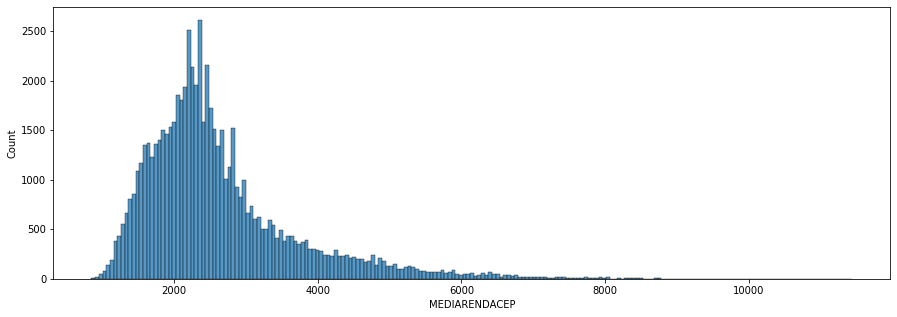

**Boxplot for MEDIARENDACEP**

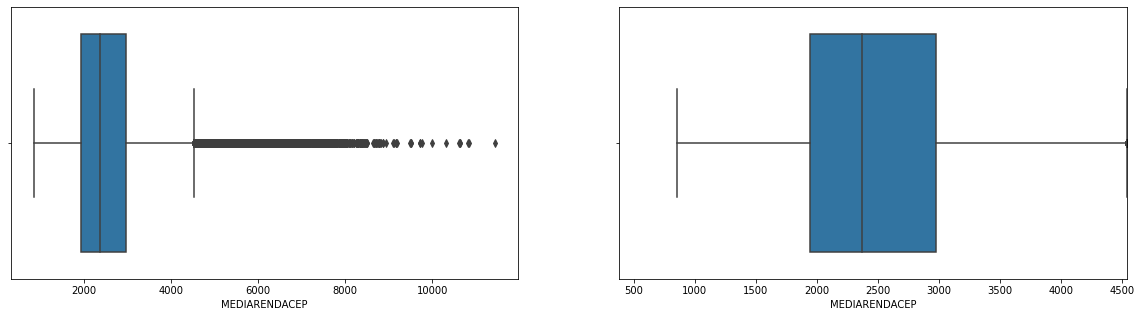

### DISCUSSION

Conforme os dados da variável MEDIARENDACEP, é possível dizer que o tipo da distribuição dos dados é   assimétrica positiva, pois a média da variável é maior do que seu valor   de moda. Essa variável se refere à renda presumida média das pessoas que vivem no mesmo CEP.   As plotagens usadas foram Histogram e Boxplot. Os gráficos   gerados mostram que a maioria dos indivíduos que vivem no mesmo CEP apresentam uma renda presumida média   entre R$1.800,00 e R$2.900,00, logo a hipótese está incorreta.

In [ ]:
column = 'MEDIARENDACEP'

display(Markdown('## {}'.format(column)))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Renda presumida média das pessoas que vivem no mesmo CEP é maior do que R$15.000,00.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown('**Histogram for {}**'.format(column)))
histogram(df[column])
plt.show()

display(Markdown('**Boxplot for {}**'.format(column)))
boxplot_with_and_without_limits(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Conforme os dados da variável MEDIARENDACEP, é possível dizer que o tipo da distribuição dos dados é \
  assimétrica positiva, pois a média da variável é maior do que seu valor \
  de moda. Essa variável se refere à renda presumida média das pessoas que vivem no mesmo CEP. \
  As plotagens usadas foram Histogram e Boxplot. Os gráficos \
  gerados mostram que a maioria dos indivíduos que vivem no mesmo CEP apresentam uma renda presumida média \
  entre R$1.800,00 e R$2.900,00, logo a hipótese está incorreta.'))

## PIBMUNICIPIO

### HYPOTHESIS

PIB municipal per capito da maior parte das cidades onde as pessoas que pediram empréstimo moram está abaixo de 20000.

### ANALYSIS

**Skewness for PIBMUNICIPIO**: 2.4493584980971836 (Positively Skewed Distribution)

**Kurtosis for PIBMUNICIPIO**: 22.91763551783571 (Leptokurtotic)

**Mean for PIBMUNICIPIO**: 31304.90070584281

**Median for PIBMUNICIPIO**: 30734.0

**Mode for PIBMUNICIPIO**: 20034.0

**Type of data distribution**: Positively Asymmetric Distribution

**Boxplot for PIBMUNICIPIO**

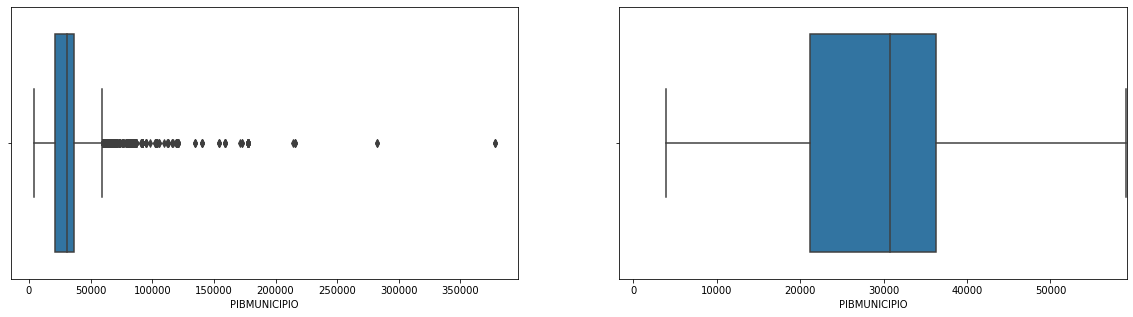

### DISCUSSION

Conforme os dados da variável PIBMUNICIPIO, é possível dizer que o tipo da distribuição dos dados é  assimétrica positiva, pois a média da variável é maior do que seu valor  de moda. Essa variável se refere ao PIB (Produto Interno Bruto) municipal per capito.  A plotagem usada foi o Boxplot. O gráfico gerado mostra que o valor do PIB (Produto Interno Bruto) per capito está  entre aproximadamente 22000 e 36000. Portanto, a hipótese está incorreta.

In [ ]:
column = 'PIBMUNICIPIO'

display(Markdown('## {}'.format(column)))

display(Markdown('### HYPOTHESIS'))
display(Markdown('PIB municipal per capito da maior parte das cidades onde as pessoas que pediram empréstimo moram está abaixo de 20000.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown('**Boxplot for {}**'.format(column)))
boxplot_with_and_without_limits(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Conforme os dados da variável PIBMUNICIPIO, é possível dizer que o tipo da distribuição dos dados é \
 assimétrica positiva, pois a média da variável é maior do que seu valor \
 de moda. Essa variável se refere ao PIB (Produto Interno Bruto) municipal per capito. \
 A plotagem usada foi o Boxplot. O gráfico gerado mostra que o valor do PIB (Produto Interno Bruto) per capito está \
 entre aproximadamente 22000 e 36000. Portanto, a hipótese está incorreta.'))

## QTDUTILITARIOMUNICIPIO

### HYPOTHESIS

Existem por volta de 4 veículos utilitários para cada 1000 habitantes nos municípios.

### ANALYSIS

**Skewness for QTDUTILITARIOMUNICIPIO**: 1.2401766605715125 (Positively Skewed Distribution)

**Kurtosis for QTDUTILITARIOMUNICIPIO**: 1.5999049005378665 (Leptokurtotic)

**Mean for QTDUTILITARIOMUNICIPIO**: 4.737201938972793

**Median for QTDUTILITARIOMUNICIPIO**: 4.0

**Mode for QTDUTILITARIOMUNICIPIO**: 4.0

**Type of data distribution**: Positively Asymmetric Distribution

**Histogram for QTDUTILITARIOMUNICIPIO (without outliers)**

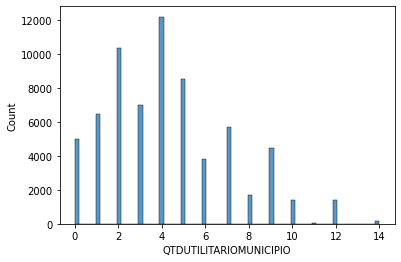

**Representation of QTDUTILITARIOMUNICIPIO using KDE**

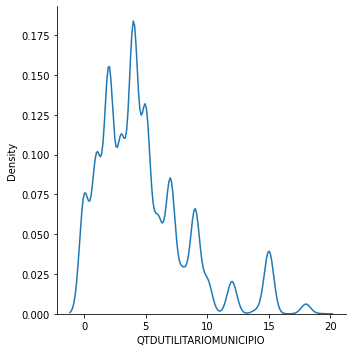

### DISCUSSION

A variável **QTDUTILITARIOMUNICIPIO** está relacionada a quantidade de veículos do tipo utilitário   existentes no município para cada 1000 habitantes. Temos que para a variável analisada a distribuição dos dados é   assimétrica positiva, uma vez que possui média maior que os valores de mediana e moda. Para visualização dos dados   foram utilizados: histogram (não apresenta outliers) e distplot. Os gráficos gerados mostram que há uma média de cerca   de 2 utilitários para 1000 habitantes no município, logo a hipótese está incorreta.

In [ ]:
column = 'QTDUTILITARIOMUNICIPIO'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Existem por volta de 4 veículos utilitários para cada 1000 habitantes nos municípios.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Histogram for {column} (without outliers)**'))
res = remove_outliers(df, column)
df2 = res[0]
sns.histplot(df2[column])
plt.show()

display(Markdown(f'**Representation of {column} using KDE**'))
sns.displot(df[column], kind='kde')
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('A variável **QTDUTILITARIOMUNICIPIO** está relacionada a quantidade de veículos do tipo utilitário \
  existentes no município para cada 1000 habitantes. Temos que para a variável analisada a distribuição dos dados é \
  assimétrica positiva, uma vez que possui média maior que os valores de mediana e moda. Para visualização dos dados \
  foram utilizados: histogram (não apresenta outliers) e distplot. Os gráficos gerados mostram que há uma média de cerca \
  de 2 utilitários para 1000 habitantes no município, logo a hipótese está incorreta.'))

## QTDAUTOMOVELMUNICIPIO

### HYPOTHESIS

Existem por volta de 200 a 300 veículos para cada 1000 habitantes nos municípios.

### ANALYSIS

**Skewness for QTDAUTOMOVELMUNICIPIO**: -0.10368917052352507 (Negatively Skewed Distribution)

**Kurtosis for QTDAUTOMOVELMUNICIPIO**: -1.1184797013584513 (Platykurtotic)

**Mean for QTDAUTOMOVELMUNICIPIO**: 294.14298523354535

**Median for QTDAUTOMOVELMUNICIPIO**: 320.0

**Mode for QTDAUTOMOVELMUNICIPIO**: 156.0

**Type of data distribution**: Negatively Asymmetric Distribution

**Histogram for QTDAUTOMOVELMUNICIPIO (without outliers)**

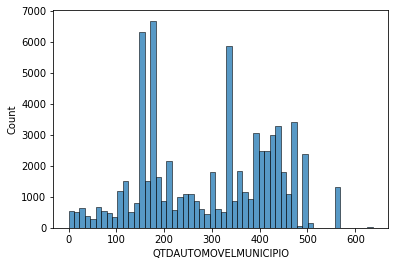

**Representation of QTDAUTOMOVELMUNICIPIO using KDE (without outliers)**

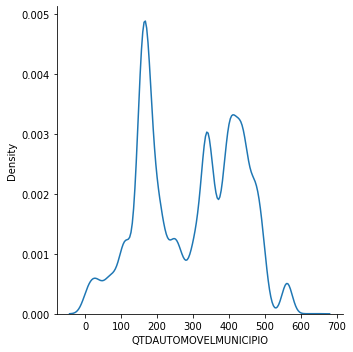

### DISCUSSION

A variável **QTDAUTOMOVELMUNICIPIO** está relacionada a quantidade de veículos do tipo automóveis   existentes no município para cada 1000 habitantes. Temos que para a variável analisada a distribuição dos dados é   assimétrica negativa, uma vez que possui média menor que os valores de mediana e maior que os valores da moda.   Para visualização dos dados foram utilizados: histogram (não apresenta outliers) e distplot. Os gráficos gerados   mostram que há uma varição entre 100 e 350 veículos para menos de 1000 habitantes no munícipio, logo a hipótese   está incorreta.

In [ ]:
column = 'QTDAUTOMOVELMUNICIPIO'
display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Existem por volta de 200 a 300 veículos para cada 1000 habitantes nos municípios.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Histogram for {column} (without outliers)**'))
res = remove_outliers(df, column)
df2 = res[0]
sns.histplot(df2[column])
plt.show()

display(Markdown(f'**Representation of {column} using KDE (without outliers)**'))
sns.displot(df[column], kind='kde')
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('A variável **QTDAUTOMOVELMUNICIPIO** está relacionada a quantidade de veículos do tipo automóveis \
  existentes no município para cada 1000 habitantes. Temos que para a variável analisada a distribuição dos dados é \
  assimétrica negativa, uma vez que possui média menor que os valores de mediana e maior que os valores da moda. \
  Para visualização dos dados foram utilizados: histogram (não apresenta outliers) e distplot. Os gráficos gerados \
  mostram que há uma varição entre 100 e 350 veículos para menos de 1000 habitantes no munícipio, logo a hipótese \
  está incorreta.'))

## QTDCAMINHAOMUNICIPIO

### HYPOTHESIS

Para cada 100 habitantes no município, existem por volta de 5 caminhões.

### ANALYSIS

**Skewness for QTDCAMINHAOMUNICIPIO**: 1.1200913985107264 (Positively Skewed Distribution)

**Kurtosis for QTDCAMINHAOMUNICIPIO**: 4.021678464751165 (Leptokurtotic)

**Mean for QTDCAMINHAOMUNICIPIO**: 15.45783014374177

**Median for QTDCAMINHAOMUNICIPIO**: 16.0

**Mode for QTDCAMINHAOMUNICIPIO**: 8.0

**Type of data distribution**: Negatively Asymmetric Distribution

**Histogram for QTDCAMINHAOMUNICIPIO (without outliers)**

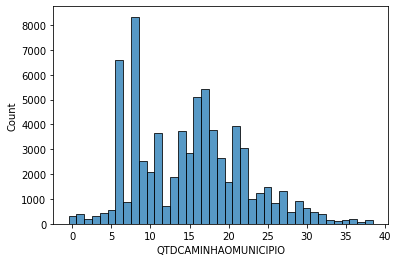

**Representation of QTDCAMINHAOMUNICIPIO using KDE (without outliers)**

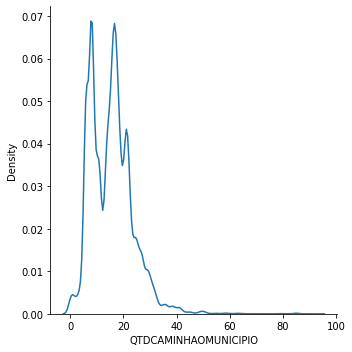

### DISCUSSION

A variável **QTDCAMINHAOMUNICIPIO** está relacionada a quantidade de veículos do tipo caminhão   existentes no município para cada 1000 habitantes. Temos que para a variável analisada a distribuição dos dados   é assimétrica negativa, uma vez que possui média menor que os valores de mediana e maior que os valores da moda.   Para visualização dos dados foram utilizados: histogram (não apresenta outliers) e distplot. Os gráficos gerados   mostram que há uma varição entre pouco mais de 5 e menos de 10 caminhões para menos de 1000 habitantes no munícipio,   logo a hipótese está incorreta.

In [ ]:
column = 'QTDCAMINHAOMUNICIPIO'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Para cada 100 habitantes no município, existem por volta de 5 caminhões.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Histogram for {column} (without outliers)**'))
res = remove_outliers(df, column)
df2 = res[0]
sns.histplot(df2[column], discrete=True)
plt.show()

display(Markdown(f'**Representation of {column} using KDE (without outliers)**'))
sns.displot(df[column], kind='kde')
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('A variável **QTDCAMINHAOMUNICIPIO** está relacionada a quantidade de veículos do tipo caminhão \
  existentes no município para cada 1000 habitantes. Temos que para a variável analisada a distribuição dos dados \
  é assimétrica negativa, uma vez que possui média menor que os valores de mediana e maior que os valores da moda. \
  Para visualização dos dados foram utilizados: histogram (não apresenta outliers) e distplot. Os gráficos gerados \
  mostram que há uma varição entre pouco mais de 5 e menos de 10 caminhões para menos de 1000 habitantes no munícipio, \
  logo a hipótese está incorreta.'))

## PERCENTPOPZONAURBANA

### HYPOTHESIS

A maior parte da população das cidades vive na área urbana.

### ANALYSIS

**Skewness for PERCENTPOPZONAURBANA**: -2.539824677463244 (Negatively Skewed Distribution)

**Kurtosis for PERCENTPOPZONAURBANA**: 6.78205537173774 (Leptokurtotic)

**Mean for PERCENTPOPZONAURBANA**: 90.70500987408788

**Median for PERCENTPOPZONAURBANA**: 96.0

**Mode for PERCENTPOPZONAURBANA**: 99.0

**Type of data distribution**: Negatively Asymmetric Distribution

**Representation of PERCENTPOPZONAURBANA using KDE**

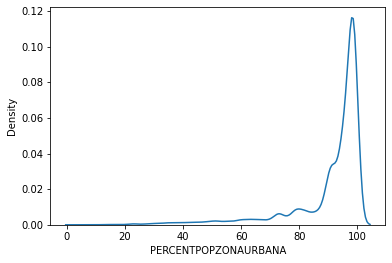

### DISCUSSION

A variável **PERCENTPOPZONAURBANA** está relacionada ao percentual da população do   município que vive na zona urbana. Temos que para a variável analisada a distribuição dos dados é   assimétrica negativa, uma vez que possui média menor que os valores de mediana e moda. Para visualização   dos dados foi utilizado o kdeplot. A partir do gráfico gerado podemos visualizar que ao menos 90%   da população encontra-se na zona urbana, logo a hipótese está correta.

In [ ]:
column = 'PERCENTPOPZONAURBANA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('A maior parte da população das cidades vive na área urbana.'))

display(Markdown('### ANALYSIS'))

skew = df_skewness[[column]][0]
display(Markdown(f'**Skewness for {column}**: {skew} ({skew_label(skew)})'))

kurtosis = df_kurtosis[[column]][0]
display(Markdown(f'**Kurtosis for {column}**: {kurtosis} ({kurtosis_label(kurtosis)})'))

mean = df[column].mean()
median = df[column].median()
mode = df[column].mode()[0]

display(Markdown(f'**Mean for {column}**: {mean}'))
display(Markdown(f'**Median for {column}**: {median}'))
display(Markdown(f'**Mode for {column}**: {mode}'))
display(Markdown(f'**Type of data distribution**: {distribution_symmetry(mean, median, mode)}'))

display(Markdown(f'**Representation of {column} using KDE**'))
sns.kdeplot(df[column])
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('A variável **PERCENTPOPZONAURBANA** está relacionada ao percentual da população do \
  município que vive na zona urbana. Temos que para a variável analisada a distribuição dos dados é \
  assimétrica negativa, uma vez que possui média menor que os valores de mediana e moda. Para visualização \
  dos dados foi utilizado o kdeplot. A partir do gráfico gerado podemos visualizar que ao menos 90% \
  da população encontra-se na zona urbana, logo a hipótese está correta.'))

## FUNCIONARIOPUBLICO

### HYPOTHESIS

Dentre as pessoas que realizaram empréstimos, a maioria é de funcionários públicos.

### ANALYSIS

**Mode for FUNCIONARIOPUBLICO**: 0.0

**Barplot for FUNCIONARIOPUBLICO**

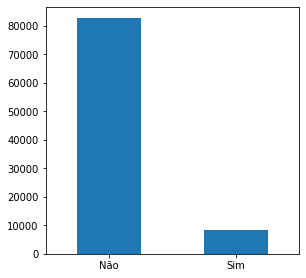

### DISCUSSION

Neste tópico foi feito a análise da variável FUNCIONARIOPUBLICO, essa variável define se a pessoa que fez empréstimo   é funcionário publico (1) ou não (0). Foi realizado uma plotagem do tipo barplot, onde ele apresenta a contagem de valores.   O gráfico gerado mostra que o número de pessoas que não são funcionários públicos é 8 vezes maior que o número de pessoas que são. Logo   é possível dizer que a hipótese definida anteriormente é falsa.

In [ ]:
column = 'FUNCIONARIOPUBLICO'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Dentre as pessoas que realizaram empréstimos, a maioria é de funcionários públicos.'))

display(Markdown('### ANALYSIS'))

mode = df[column].mode()[0]

display(Markdown(f'**Mode for {column}**: {mode}'))

display(Markdown(f'**Barplot for {column}**'))
barplot(df[column], column)
plt.xticks([0.0, 1.0], ['Não', 'Sim'], rotation=0)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Neste tópico foi feito a análise da variável FUNCIONARIOPUBLICO, essa variável define se a pessoa que fez empréstimo \
  é funcionário publico (1) ou não (0). Foi realizado uma plotagem do tipo barplot, onde ele apresenta a contagem de valores. \
  O gráfico gerado mostra que o número de pessoas que não são funcionários públicos é 8 vezes maior que o número de pessoas que são. Logo \
  é possível dizer que a hipótese definida anteriormente é falsa.'))

## FUNCIONARIOPUBLICOCASA

### HYPOTHESIS

Dentre os empréstimos realizados, a maioria das pessoas tinha algum funcionário público dentro de casa.

### ANALYSIS

**Mode for FUNCIONARIOPUBLICOCASA**: 0.0

**Barplot for FUNCIONARIOPUBLICOCASA**

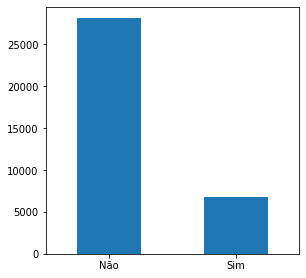

### DISCUSSION

Analisando a moda e o gráfico é perceptível que as pessoas que realizaram empréstimo,   em grande maioria, não possuíam em suas casas, alguém que era funcionário público.   Portanto, é possível concluir que a hipótese definida anteriormente é falsa.

In [ ]:
column = 'FUNCIONARIOPUBLICOCASA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Dentre os empréstimos realizados, a maioria das pessoas tinha algum funcionário público dentro de casa.'))

display(Markdown('### ANALYSIS'))

mode = df[column].mode()[0]

display(Markdown(f'**Mode for {column}**: {mode}'))

display(Markdown(f'**Barplot for {column}**'))
barplot(df[column], column)
plt.xticks([0.0, 1.0], ['Não', 'Sim'], rotation=0)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando a moda e o gráfico é perceptível que as pessoas que realizaram empréstimo, \
  em grande maioria, não possuíam em suas casas, alguém que era funcionário público. \
  Portanto, é possível concluir que a hipótese definida anteriormente é falsa.'))

## BOLSAFAMILIACASA

### HYPOTHESIS

Dentre as pessoas que fizeram empréstimo, a maior parte que possuía alguém em casa que fazia parte do programa Bolsa Família, fez algum empréstimo.

### ANALYSIS

**Mode for BOLSAFAMILIACASA**: 0.0

**Barplot for BOLSAFAMILIACASA**

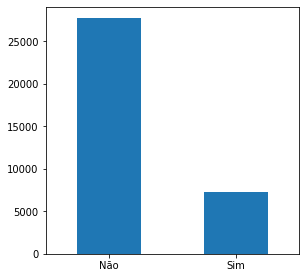

### DISCUSSION

Considerando a moda e o gráfico de barplot da análise. Podemos concluir que a hipótese é falsa, pois a maioria das pessoas que fizeram empréstimos não têm em casa algum integrante que faz parte do programa Bolsa Família.

In [ ]:
column = 'BOLSAFAMILIACASA'

display(Markdown(f'## {column}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Dentre as pessoas que fizeram empréstimo, a maior parte que possuía alguém em casa que fazia parte do programa Bolsa Família, fez algum empréstimo.'))

display(Markdown('### ANALYSIS'))

mode = df[column].mode()[0]

display(Markdown(f'**Mode for {column}**: {mode}'))

display(Markdown(f'**Barplot for {column}**'))
barplot(df[column], column, )
plt.xticks([0.0, 1.0], ['Não', 'Sim'], rotation=0)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Considerando a moda e o gráfico de barplot da análise. Podemos concluir que a hipótese é falsa, pois a maioria das pessoas que fizeram empréstimos não têm em casa algum integrante que faz parte do programa Bolsa Família.'))

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

## MEDIARENDACASA and SOMARENDACASA

### HYPOTHESIS

Como ambas as variáveis estão relacionadas com a renda das pessoas, é muito provável que tais variáveis estejam fortemente relacionadas. Por isso é esperado encontrar uma correlação alta entre elas.

### ANALYSIS

**Lmplot for MEDIARENDACASA and SOMARENDACASA**

<Figure size 1080x360 with 0 Axes>

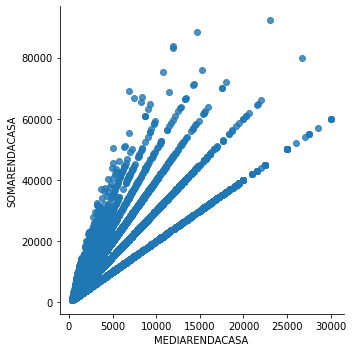

### DISCUSSION

Analisando o gráfico Lmplot, é possível verificar que as variáveis MEDIARENDACASA e SOMARENDACASA estão altamente correlacionadas, pois quando o valor de uma delas aumenta, o valor da outra tende a aumentar também. Com isso, a hipótese de que ambas as variáveis apresentadas estejam fortemente relacionadas está correta.

In [ ]:
MEDIARENDACASA = 'MEDIARENDACASA'
SOMARENDACASA = 'SOMARENDACASA'

display(Markdown(f'## {MEDIARENDACASA} and {SOMARENDACASA}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Como ambas as variáveis estão relacionadas com a renda das pessoas, é muito provável que tais variáveis estejam fortemente relacionadas. Por isso \
é esperado encontrar uma correlação alta entre elas.'))

display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {MEDIARENDACASA} and {SOMARENDACASA}**'))

plt.figure(figsize=(15,5))
sns.lmplot(x=MEDIARENDACASA, y=SOMARENDACASA, data=df,fit_reg=False)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando o gráfico Lmplot, é possível verificar que as variáveis MEDIARENDACASA e SOMARENDACASA estão altamente correlacionadas, \
pois quando o valor de uma delas aumenta, o valor da outra tende a aumentar também. Com isso, a hipótese de que ambas as variáveis apresentadas \
estejam fortemente relacionadas está correta.'))

## QTDPESSOASCASA and MEDIARENDACASA

### HYPOTHESIS

Quanto mais pessoas em uma casa, maior é a renda média dessas pessoas.

### ANALYSIS

**Lmplot for QTDPESSOASCASA and MEDIARENDACASA**

<Figure size 1080x360 with 0 Axes>

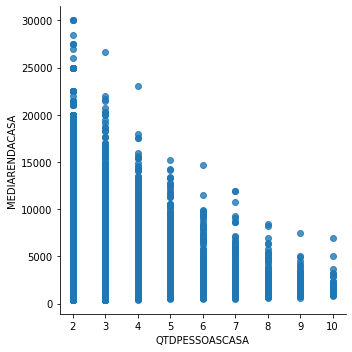

**Boxplot for QTDPESSOASCASA and MEDIARENDACASA**

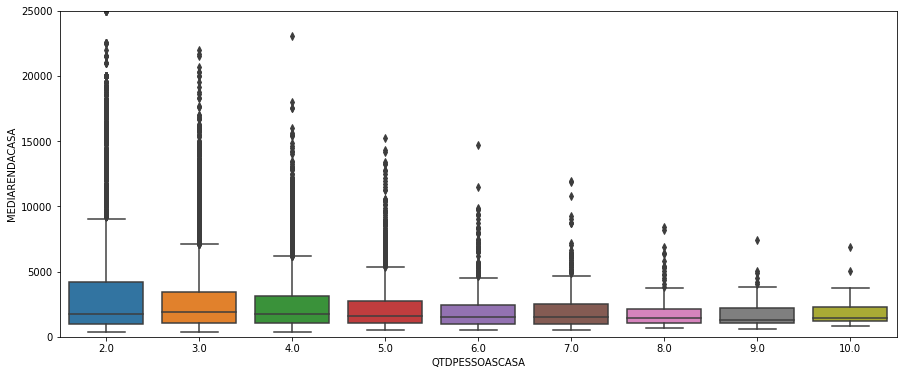

### DISCUSSION

Analisando as plotagens lmplot e Boxplot, é possível verificar que quanto maior o número de pessoas, menor a renda média da casa. Isso provavelmente ocorre devido ao fato de que nem todas as pessoas que vivem na mesma casa possuem uma renda. O coeficiente de correlação é negativo, pois quando o valor da variável QTDPESSOASCASA aumenta, o valor da variável MEDIARENDACASA tende a diminuir. Com isso, a hipótese de que quanto mais pessoas em uma casa, maior é a renda média dessas pessoas, está incorreta.

In [ ]:
QTDPESSOASCASA = 'QTDPESSOASCASA'
MEDIARENDACASA = 'MEDIARENDACASA'

display(Markdown(f'## {QTDPESSOASCASA} and {MEDIARENDACASA}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Quanto mais pessoas em uma casa, maior é a renda média dessas pessoas.'))

display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {QTDPESSOASCASA} and {MEDIARENDACASA}**'))

plt.figure(figsize=(15,5))
sns.lmplot(x=QTDPESSOASCASA, y=MEDIARENDACASA, data=df, fit_reg=False)
plt.show()

display(Markdown(f'**Boxplot for {QTDPESSOASCASA} and {MEDIARENDACASA}**'))

plt.figure(figsize=(15,6))
sns.boxplot(x=df[QTDPESSOASCASA], y=df[MEDIARENDACASA])
plt.ylim(0,25000)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando as plotagens lmplot e Boxplot, é possível verificar que quanto maior o número de pessoas, menor a \
renda média da casa. Isso provavelmente ocorre devido ao fato de que nem todas as pessoas que vivem na mesma casa possuem \
uma renda. O coeficiente de correlação é negativo, pois quando o valor da variável QTDPESSOASCASA aumenta, o valor da \
variável MEDIARENDACASA tende a diminuir. Com isso, a hipótese de que quanto mais pessoas em uma casa, maior é a renda \
média dessas pessoas, está incorreta.'))

## IDHMUNICIPIO and QTDAUTOMOVELMUNICIPIO

### HYPOTHESIS

Quanto maior o IDH de um município, maior será a quantidade de automóveis nesse município.

### ANALYSIS

**Lmplot for IDHMUNICIPIO and QTDAUTOMOVELMUNICIPIO**

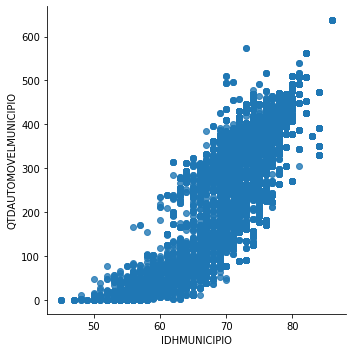

### DISCUSSION

Analisando a plotagem Lmplot, é possível verificar que quanto maior o IDH de um município, maior a quantidade de automóveis nesse município. O coeficiente de correlação é positivo (0.8), pois quando o valor da variável IDHMUNICIPIO aumenta, o valor da variável QTDAUTOMOVELMUNICIPIO tende a aumentar também, embora esse aumento não seja constante. Com isso, a hipótese de que quanto maior o IDH de um município, maior será a quantidade de automóveis nesse município está correta.

In [ ]:
IDHMUNICIPIO = 'IDHMUNICIPIO'
QTDAUTOMOVELMUNICIPIO = 'QTDAUTOMOVELMUNICIPIO'

display(Markdown(f'## {IDHMUNICIPIO} and {QTDAUTOMOVELMUNICIPIO}'))
display(Markdown('### HYPOTHESIS'))
display(Markdown('Quanto maior o IDH de um município, maior será a quantidade de automóveis \
nesse município.'))
display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {IDHMUNICIPIO} and {QTDAUTOMOVELMUNICIPIO}**'))

sns.lmplot(x=IDHMUNICIPIO,y=QTDAUTOMOVELMUNICIPIO, data=df, fit_reg=False)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando a plotagem Lmplot, é possível verificar que quanto maior o IDH de um município, maior \
a quantidade de automóveis nesse município. O coeficiente de correlação é positivo (0.8), pois \
quando o valor da variável IDHMUNICIPIO aumenta, o valor da variável QTDAUTOMOVELMUNICIPIO tende a aumentar também, embora esse \
aumento não seja constante. Com isso, a hipótese de que quanto maior o IDH de um município, maior será a quantidade de automóveis \
nesse município está correta.'))

## MAIORRENDACASA and QTDDECLARACAO10

### HYPOTHESIS

Quanto maior o número de declarações de IRPF nos últimos 10 anos, maior será a renda do indivíduo que realizou essas declarações.

### ANALYSIS

**Lmplot for MAIORRENDACASA e QTDDECLARACAO10**

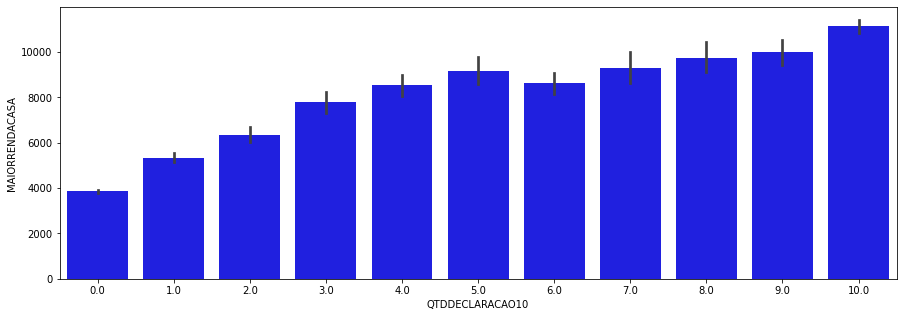

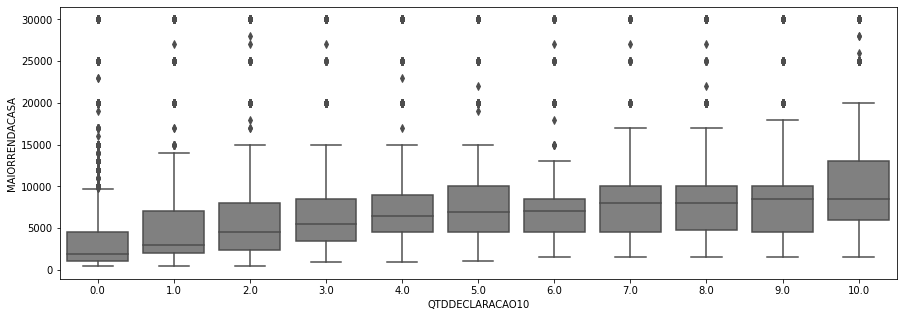

### DISCUSSION

Analisando as plotagens Barplot e Boxplot, é possível verificar que quanto maior a renda de um indivíduo, maior o número de declarações de IRPF que este indivíduo realizou nos últimos 10 anos. O coeficiente de correlação é positiva (0.44), pois quando o valor da variável QTDDECLARACAO10 aumenta, o valor da variável MAIORRENDACASA tende a aumentar também, embora esse aumento não seja constante. Com isso, a hipótese de que quanto maior o número de declarações de IRPF nos últimos 10 anos, maior será a renda do indivíduo que realizou essas declarações está correta.

In [ ]:
MAIORRENDACASA = 'MAIORRENDACASA'
QTDDECLARACAO10 = 'QTDDECLARACAO10'

display(Markdown(f'## {MAIORRENDACASA} and {QTDDECLARACAO10}'))
display(Markdown('### HYPOTHESIS'))
display(Markdown('Quanto maior o número de declarações de IRPF nos últimos 10 anos, maior será a renda do indivíduo \
que realizou essas declarações.'))
display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {MAIORRENDACASA} e {QTDDECLARACAO10}**'))

plt.figure(figsize=(15,5))
sns.barplot(x=QTDDECLARACAO10,y=MAIORRENDACASA, data=df, color="blue")
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=df[QTDDECLARACAO10], y=df[MAIORRENDACASA], color="grey")
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando as plotagens Barplot e Boxplot, é possível verificar que quanto maior a renda de um indivíduo, maior \
o número de declarações de IRPF que este indivíduo realizou nos últimos 10 anos. O coeficiente de correlação é positiva (0.44), pois \
quando o valor da variável QTDDECLARACAO10 aumenta, o valor da variável MAIORRENDACASA tende a aumentar também, embora esse \
aumento não seja constante. Com isso, a hipótese de que quanto maior o número de declarações de IRPF nos últimos 10 anos, maior \
será a renda do indivíduo que realizou essas declarações está correta.'))

## PERCENTBOLSAFAMILIACEP and MEDIARENDACEP

### HYPOTHESIS

Quanto maior o percentual de pessoas inscritas no Bolsa Família que vivem no mesmo CEP do proponente, menor será a renda presumida média dessas pessoas.

### ANALYSIS

**Lmplot for PERCENTBOLSAFAMILIACEP e MEDIARENDACEP**

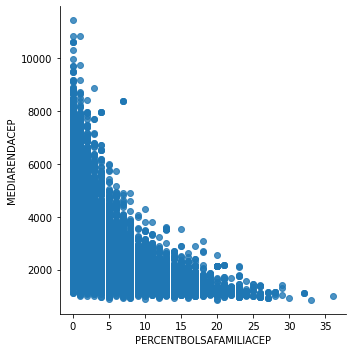

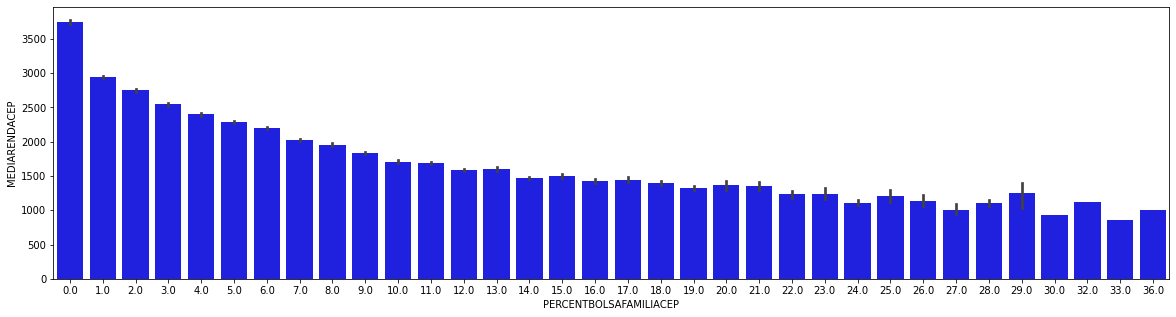

### DISCUSSION

Analisando as plotagens Lmplot e Barplot, é possível verificar que quanto maior o percentual de pessoas inscritas no Bolsa Família que vivem no mesmo CEP do proponente, menor será a renda presumida média dessas pessoas, provando que a hipótese está correta. O coeficiente de correlação é negativo (-0.53), pois quando o valor da variável PERCENTBOLSAFAMILIACEP aumenta, o valor da variável MEDIARENDACEP tende a diminuir, embora essa diminuição não seja constante.

In [ ]:
PERCENTBOLSAFAMILIACEP = 'PERCENTBOLSAFAMILIACEP'
MEDIARENDACEP = 'MEDIARENDACEP'

display(Markdown(f'## {PERCENTBOLSAFAMILIACEP} and {MEDIARENDACEP}'))
display(Markdown('### HYPOTHESIS'))
display(Markdown('Quanto maior o percentual de pessoas inscritas no Bolsa Família que vivem no mesmo CEP do proponente, \
menor será a renda presumida média dessas pessoas.'))
display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {PERCENTBOLSAFAMILIACEP} e {MEDIARENDACEP}**'))

sns.lmplot(x=PERCENTBOLSAFAMILIACEP,y=MEDIARENDACEP, data=df, fit_reg=False)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x=PERCENTBOLSAFAMILIACEP,y=MEDIARENDACEP, data=df, color="blue")
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando as plotagens Lmplot e Barplot, é possível verificar que quanto maior o percentual de pessoas \
inscritas no Bolsa Família que vivem no mesmo CEP do proponente, menor será a renda presumida média dessas pessoas, \
provando que a hipótese está correta. O coeficiente de correlação é negativo (-0.53), pois quando o valor da variável \
PERCENTBOLSAFAMILIACEP aumenta, o valor da variável MEDIARENDACEP tende a diminuir, embora essa diminuição não seja constante.'))

## MENORRENDACASA, INDICEEMPREGO and BOLSAFAMILIACASA

### HYPOTHESIS

O alto índice de desemprego está correlacionado com o fato de alguém   na família estar no programa Bolsa Família e a menor renda abaixo de R$5.000,00.

### ANALYSIS

**Displot for MENORRENDACASA, INDICEEMPREGO and BOLSAFAMILIACASA**

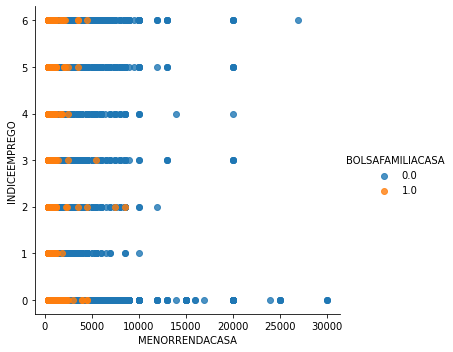

### DISCUSSION

Analisando a plotagem do tipo Lmplot, podemos observar que   a hipótese não está correta, pois o índice de emprego varia de 0 a 6 independente   do fato de ter alguém na família inscrito no programa Bolsa Família ou de ter uma   menor renda abaixo de R$5.000,00.

In [ ]:
MENORRENDACASA = 'MENORRENDACASA'
INDICEEMPREGO = 'INDICEEMPREGO'
BOLSAFAMILIACASA = 'BOLSAFAMILIACASA'

display(Markdown(f'## {MENORRENDACASA}, {INDICEEMPREGO} and {BOLSAFAMILIACASA}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('O alto índice de desemprego está correlacionado com o fato de alguém \
  na família estar no programa Bolsa Família e a menor renda abaixo de R$5.000,00.'))

display(Markdown('### ANALYSIS'))
display(Markdown(f'**Displot for {MENORRENDACASA}, {INDICEEMPREGO} and {BOLSAFAMILIACASA}**'))

sns.lmplot(data=df, x=MENORRENDACASA, y=INDICEEMPREGO, hue=BOLSAFAMILIACASA, fit_reg=False)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando a plotagem do tipo Lmplot, podemos observar que \
  a hipótese não está correta, pois o índice de emprego varia de 0 a 6 independente \
  do fato de ter alguém na família inscrito no programa Bolsa Família ou de ter uma \
  menor renda abaixo de R$5.000,00.'))

## DISTZONARISCO and QTDPESSOASCASA

### HYPOTHESIS

Quanto mais pessoas em uma casa, mais perto de uma zona de risco elas vivem.

### ANALYSIS

**Lmplot for DISTZONARISCO and QTDPESSOASCASA**

<Figure size 1080x360 with 0 Axes>

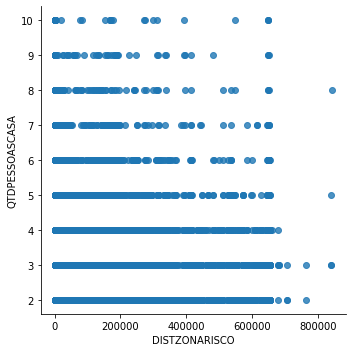

### DISCUSSION

Considerado a analise da plotagem lmplot, é possível notar que quanto maior o número de pessoas, mais perto da zona de risco elas vivem. Isso provavelmente ocorre devido ao fato de que quanto mais pessoas vivendo em um local, é mais provável que as condições de vida sejam desfavoráveis fazendo com que acabem indo para localidades com maiores riscos. Então, é plausível admitir que a hipótese esta correta.

In [ ]:
DISTZONARISCO = 'DISTZONARISCO'
QTDPESSOASCASA = 'QTDPESSOASCASA'

display(Markdown(f'## {DISTZONARISCO} and {QTDPESSOASCASA}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Quanto mais pessoas em uma casa, mais perto de uma zona de risco elas vivem.'))

display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {DISTZONARISCO} and {QTDPESSOASCASA}**'))

plt.figure(figsize=(15,5))
sns.lmplot(x=DISTZONARISCO, y=QTDPESSOASCASA, data=df, fit_reg=False)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Considerado a analise da plotagem lmplot, é possível notar que quanto maior o número de pessoas, mais \
perto da zona de risco elas vivem. Isso provavelmente ocorre devido ao fato de que quanto mais pessoas vivendo em um local, \
é mais provável que as condições de vida sejam desfavoráveis fazendo com que acabem indo para localidades \
com maiores riscos. Então, é plausível admitir que a hipótese esta correta.'))

## PERCENTPOPZONAURBANA and SOMARENDACASA

### HYPOTHESIS

Quanto maior seja o numero da população do municipio na zona urbana, maior é a soma da renda da casa.

### ANALYSIS

**Lmplot for PERCENTPOPZONAURBANA and SOMARENDACASA**

<Figure size 1080x360 with 0 Axes>

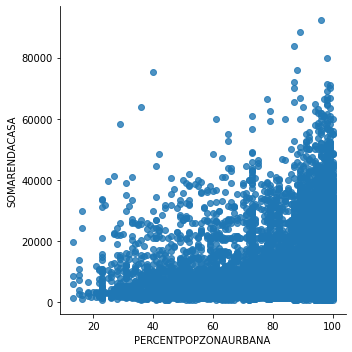

**Boxplot for PERCENTPOPZONAURBANA and SOMARENDACASA**

### DISCUSSION

Analisando as plotagens lmplot e Boxplot, é possível visualizar que quanto maior o número da população do município na zona urbana, a soma da renda da casa tende a crescer. Este resultado provavelmente pode ser justificado pelo fato de que se a pessoa a maioria da população de um município esta na zona urbana, naquele local possui mais agitação e movimentação de pessoas, acarretando em um acumulo maior de moradores. Assim gerando diferentes tipos de comércios, trabalhos e etc.

In [ ]:
PERCENTPOPZONAURBANA = 'PERCENTPOPZONAURBANA'
SOMARENDACASA = 'SOMARENDACASA'

display(Markdown(f'## {PERCENTPOPZONAURBANA} and {SOMARENDACASA}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Quanto maior seja o numero da população do municipio na zona urbana, maior é a soma da renda da casa.'))

display(Markdown('### ANALYSIS'))
display(Markdown(f'**Lmplot for {PERCENTPOPZONAURBANA} and {SOMARENDACASA}**'))

plt.figure(figsize=(15,5))
sns.lmplot(x=PERCENTPOPZONAURBANA, y=SOMARENDACASA, data=df, fit_reg=False)
plt.show()

display(Markdown(f'**Boxplot for {PERCENTPOPZONAURBANA} and {SOMARENDACASA}**'))



display(Markdown('### DISCUSSION'))
display(Markdown('Analisando as plotagens lmplot e Boxplot, é possível visualizar que quanto maior o número da população do município na zona urbana, a soma da renda da casa \
tende a crescer. Este resultado provavelmente pode ser justificado pelo fato de que se a pessoa a maioria da população de um município esta na zona urbana, naquele local possui \
mais agitação e movimentação de pessoas, acarretando em um acumulo maior de moradores. Assim gerando diferentes tipos de comércios, trabalhos e etc.'))

## QTDUTILITARIOMUNICIPIO and PIBMUNICIPIO

### HYPOTHESIS

Conforme o número de veículos utilitários por 1000 habitantes aumenta   maior é o PIB do município.

### ANALYSIS

**Displot for QTDUTILITARIOMUNICIPIO and PIBMUNICIPIO**

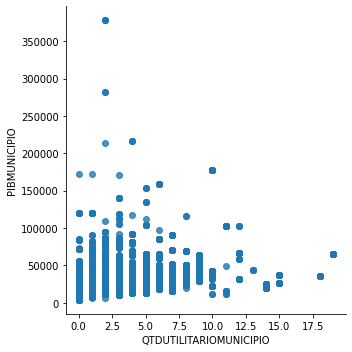

### DISCUSSION

Analisando a plotagem do tipo Lmplot, podemos observar que   a hipótese não está correta, pois é possível observar que mesmo para registros   de pessoas que moram em locais com alto número de veículos, o PIB não cresce na   mesma escala.

In [ ]:
QTDUTILITARIOMUNICIPIO = 'QTDUTILITARIOMUNICIPIO'
PIBMUNICIPIO = 'PIBMUNICIPIO'

display(Markdown(f'## {QTDUTILITARIOMUNICIPIO} and {PIBMUNICIPIO}'))

display(Markdown('### HYPOTHESIS'))
display(Markdown('Conforme o número de veículos utilitários por 1000 habitantes aumenta \
  maior é o PIB do município.'))

display(Markdown('### ANALYSIS'))
display(Markdown(f'**Displot for {QTDUTILITARIOMUNICIPIO} and {PIBMUNICIPIO}**'))

sns.lmplot(data=df, x=QTDUTILITARIOMUNICIPIO, y=PIBMUNICIPIO, fit_reg=False)
plt.show()

display(Markdown('### DISCUSSION'))
display(Markdown('Analisando a plotagem do tipo Lmplot, podemos observar que \
  a hipótese não está correta, pois é possível observar que mesmo para registros \
  de pessoas que moram em locais com alto número de veículos, o PIB não cresce na \
  mesma escala.'))

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate to convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

## PERCENTBOLSAFAMILIACEP and MEDIARENDACEP

### ANALYSIS

<Figure size 1440x360 with 0 Axes>

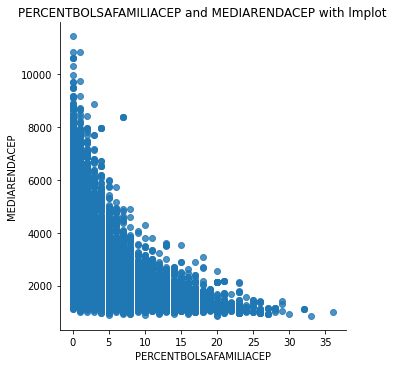

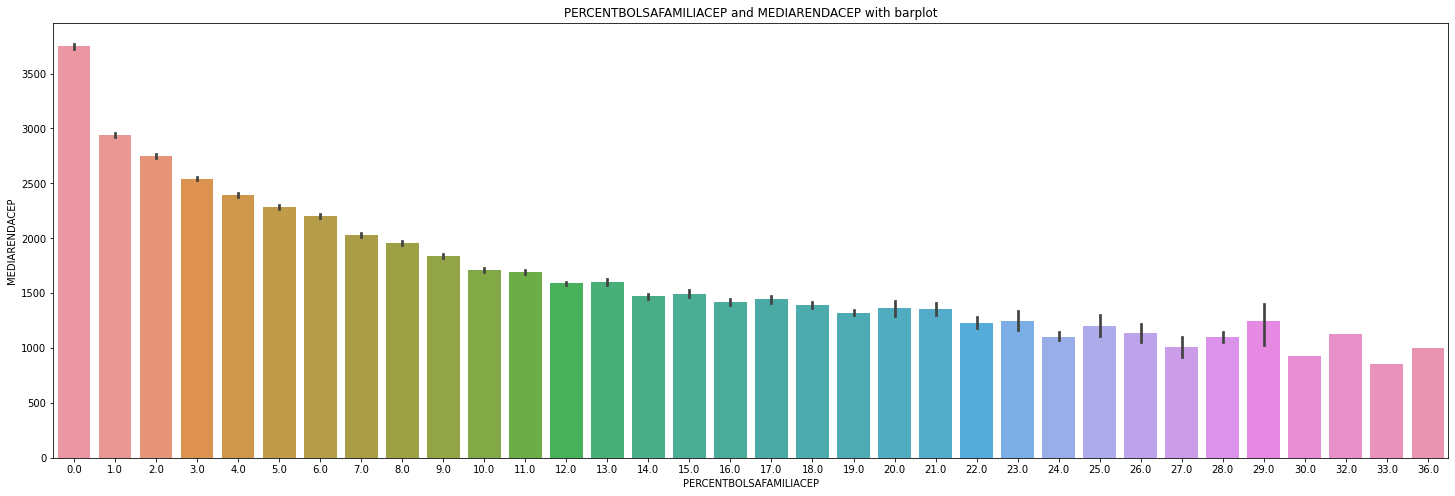

### DESCRIPTION

Foi apresentado uma plotagem de densidade (lmplot) e uma plotagem de barras (barplot). Ambas                  representam análises multivariadas que relacionas as variáveis: PERCENTBOLSAFAMILIACEP e MEDIARENDACEP.                  O coeficiente de correlação das variáveis é negativo, pois quando o valor de uma variável aumenta,                  o valor da outra variável tende a diminuir. Os valores apresentados no eixo vertical de ambos os gráficos                  apresentam intervalos diferentes, pois os outliers não foram considerados na plotagem de barras.

In [ ]:
PERCENTBOLSAFAMILIACEP = 'PERCENTBOLSAFAMILIACEP'
MEDIARENDACEP = 'MEDIARENDACEP'

display(Markdown(f'## {PERCENTBOLSAFAMILIACEP} and {MEDIARENDACEP}'))
display(Markdown('### ANALYSIS'))

plt.figure(figsize=(20,5))
sns.lmplot(x=PERCENTBOLSAFAMILIACEP,y=MEDIARENDACEP, data=df, fit_reg=False)
plt.title("PERCENTBOLSAFAMILIACEP and MEDIARENDACEP with lmplot")
plt.show()


plt.figure(figsize=(25,8))
sns.barplot(x=PERCENTBOLSAFAMILIACEP,y=MEDIARENDACEP, data=df)
plt.title("PERCENTBOLSAFAMILIACEP and MEDIARENDACEP with barplot")
plt.show()


display(Markdown('### DESCRIPTION'))
display(Markdown('Foi apresentado uma plotagem de densidade (lmplot) e uma plotagem de barras (barplot). Ambas \
                 representam análises multivariadas que relacionas as variáveis: PERCENTBOLSAFAMILIACEP e MEDIARENDACEP. \
                 O coeficiente de correlação das variáveis é negativo, pois quando o valor de uma variável aumenta, \
                 o valor da outra variável tende a diminuir. Os valores apresentados no eixo vertical de ambos os gráficos \
                 apresentam intervalos diferentes, pois os outliers não foram considerados na plotagem de barras.'))

## MAIORRENDACASA and QTDDECLARACAO10

### ANALYSIS

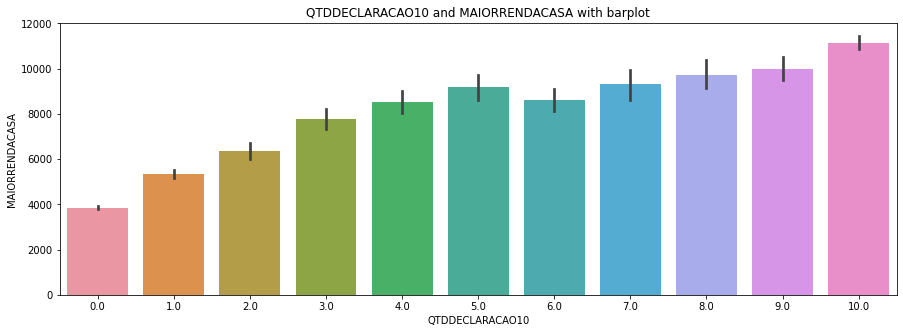

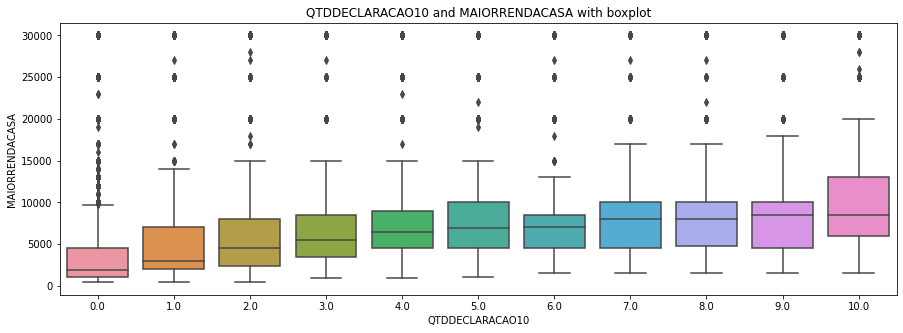

### DESCRIPTION

Foi apresentado uma plotagem de caixa (boxplot) e uma plotagem de barras (barplot). Ambas representam análises multivariadas que relacionas as variáveis: QTDDECLARACAO10 e MAIORRENDACASA. O coeficiente de correlação das variáveis é positivo, pois quando o valor de uma variável aumenta, o valor da outra variável tende a aumentar. Os valores apresentados no eixo vertical de ambos os gráficos apresentam intervalos diferentes, pois os outliers não foram considerados na plotagem de barras.

In [ ]:
MAIORRENDACASA = 'MAIORRENDACASA'
QTDDECLARACAO10 = 'QTDDECLARACAO10'

display(Markdown(f'## {MAIORRENDACASA} and {QTDDECLARACAO10}'))

display(Markdown('### ANALYSIS'))

plt.figure(figsize=(15,5))
sns.barplot(x=QTDDECLARACAO10,y=MAIORRENDACASA, data=df)
plt.title('QTDDECLARACAO10 and MAIORRENDACASA with barplot')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=df[QTDDECLARACAO10], y=df[MAIORRENDACASA])
plt.title('QTDDECLARACAO10 and MAIORRENDACASA with boxplot')
plt.show()

display(Markdown('### DESCRIPTION'))
display(Markdown('Foi apresentado uma plotagem de caixa (boxplot) e uma plotagem de barras (barplot). Ambas representam \
análises multivariadas que relacionas as variáveis: QTDDECLARACAO10 e MAIORRENDACASA. O coeficiente de correlação das variáveis \
é positivo, pois quando o valor de uma variável aumenta, o valor da outra variável tende a aumentar. Os valores apresentados no eixo \
vertical de ambos os gráficos apresentam intervalos diferentes, pois os outliers não foram considerados na plotagem de barras.'))

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

Levando em consideração o contexto da base de dados, chegamos à conclusão de que a renda é um fator determinante para analisar a credibilidade financeira de uma pessoa e determinar se um empréstimo pode ser aprovado ou não. A maioria das variáveis selecionadas para a análise estão diretamente relacionadas com a renda (MEDIARENDACASA, SOMARENDACASA, MAIORRENDACASA, entre outras variáveis) ou não (IDHMUNICIPIO, PIBMUNICIPIO, QTDAUTOMOVELMUNICIPIO, BOLSAFAMILIACASA, entre outras variáveis).

Algumas das variáveis selecionadas (principalmente aquelas diretamente relacionadas com a renda) apresentam muitos valores nulos (mais de 50%) e uma grande quantidade de outliers, enquanto a maior parte das variáveis (13 das 20 variáveis) possuem menos de 30% de seus valores como nulos. Embora houvesse uma grande quantidade de valores faltantes em determinadas variáveis, elas não foram apagadas e foram levadas em consideração durante a análise. Quando estávamos realizando as análises univariadas, verificamos que as distribuições de dados das variáveis não booleanas podem ser classificadas em dois tipos: assimétrica positiva ou assimétrica negativa (levando em consideração os valores de média, mediana e moda de cada variável).

Tivemos alguns resultados óbvios quando estávamos realizando as análises multivariadas, pois em alguns casos utilizamos duas variáveis relacionadas diretamente com a renda (MEDIARENDACASA e SOMARENDACASA, por exemplo), mas também tivemos resultados óbvios ao utilizar duas variáveis indiretamente relacionadas com a renda (IDHMUNICIPIO e QTDAUTOMOVELMUNICIPIO, por exemplo). Ainda em relação às análises multivariadas, realizamos a maioria dessas análises utilizando variáveis diretamente relacionadas à renda, como: SOMARENDACASA, MEDIARENDACASA, MAIORRENDACASA e MEDIARENDACEP.

Utilizamos diferentes tipos de plotagens de gráficos tanto nas análises univariadas quanto nas multivariadas, usando histogramas (distplot) e gráficos de caixa (boxplot) na maior parte das plotagens, com algumas exceções: gráfico de barras (barplot), plotagem de violino (violinplot) e gráficos de dispersão (lmplot). Isso ocorreu devido ao fato de que estávamos tentando achar o melhor tipo de plotagem para as diferentes variáveis. Acreditamos que fizemos um bom trabalho nas análises univariadas, pois tentamos deixar bem evidente as diferentes concentrações de valores nas variáveis apresentadas, junto com os tipos de distribuição de dados.

Em relação às análises multivariadas, tivemos certa dificuldade em realizar plotagens que deixassem evidente o tipo de distribuição de dados ao relacionar duas variáveis diferentes, então não houve muita variação nos tipos de plotagens. Dentre todas as variáveis presentes na base de dados original, acreditamos que selecionamos algumas das variáveis mais relevantes para realizar a análise levando em consideração o contexto da base de dados.